<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 5 </code><b>

<b>Group Members:</b>  

1. <code>Mansi_B00945329</code>
2. <code><Member_2_firstname>Keyur_B00935171</code>
3. <code><Member_3_firstname>Parth_B00931931</code>


# 1. Dataset Information

<h4> Dataset Name: <code>Taiwanese Bankruptcy Prediction </code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction</code> </h4>
<h4> Dataset Description: </h4>
<code>The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.</code>


# 2. Task Information

<h4> Task Goal: <code>Perform analysis, EDA on data and train models with criteria listed</code></h4>
<h4> Task Description: </h4>
    <code>In this study, we conducted a comprehensive evaluation of four machine learning models—SVM, Random Forest, XGBoost, and Gradient Boosting Classifier—across various preprocessing scenarios involving PCA for dimensionality reduction and SMOTE for data balancing.</code>
<h4> Task Completed By: <code>Mansi Vaghasiya (B00945329)</code></h4>

# 3. Task Implementation: Coding

### Package Installation and Dataset<a id='top'></a>

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

import time
from prettytable import PrettyTable

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

## Data Importation & Description

The data is collected from Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. The dataset consists of multiple financial ratio features such as:

Return on Assets (ROAs)
Gross Profits
Operating & Net income and Expenses
Cash flows
Taxes
Growth rate
Debt
Turnover, Revenue, Liability, etc.

The companies in the dataset are mainly composed of manufacturing companies including industrial and electronic companies (346 companies), service industries (39 companies) and others (93 companies). This dataset is highly imbalanced as expected. It makes this problem very challenging to generalise well for final predictions.

There are total 6819 samples in dataset and 96 features (including class label). Out of 6819, 6599 are negative class and only 220 are positive class.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML BD/data.csv")

In [ ]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

**Target**
Y - Bankrupt?: Class label: 0 - Not Bankrupt , 1 - Bankrupt

**Attribute Information**
Certainly! Here's the formatted list of features with a line break between each one for clarity:

1. ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

2. ROA(A) before interest and % after tax: Return On Total Assets(A)

3. ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

4. Operating Gross Margin: Gross Profit/Net Sales

5. Realized Sales Gross Margin: Realized Gross Profit/Net Sales

6. Operating Profit Rate: Operating Income/Net Sales

7. Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

8. After-tax net Interest Rate: Net Income/Net Sales

9. Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

10. Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

11. Operating Expense Rate: Operating Expenses/Net Sales

12. Research and development expense rate: (Research and Development Expenses)/Net Sales

13. Cash flow rate: Cash Flow from Operating/Current Liabilities

14. Interest-bearing debt interest rate: Interest-bearing Debt/Equity

15. Tax rate (A): Effective Tax Rate

16. Net Value Per Share (B): Book Value Per Share(B)

17. Net Value Per Share (A): Book Value Per Share(A)

18. Net Value Per Share (C): Book Value Per Share(C)

19. Persistent EPS in the Last Four Seasons: EPS-Net Income

20. Cash Flow Per Share

21. Revenue Per Share (Yuan ¥): Sales Per Share

22. Operating Profit Per Share (Yuan ¥): Operating Income Per Share

23. Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

24. Realized Sales Gross Profit Growth Rate

25. Operating Profit Growth Rate: Operating Income Growth

26. After-tax Net Profit Growth Rate: Net Income Growth

27. Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

28. Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

29. Total Asset Growth Rate: Total Asset Growth

30. Net Value Growth Rate: Total Equity Growth

31. Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

32. Cash Reinvestment %: Cash Reinvestment Ratio

33. Current Ratio

34. Quick Ratio: Acid Test

35. Interest Expense Ratio: Interest Expenses/Total Revenue

36. Total debt/Total net worth: Total Liability/Equity Ratio

37. Debt ratio %: Liability/Total Assets

38. Net worth/Assets: Equity/Total Assets

39. Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

40. Borrowing dependency: Cost of Interest-bearing Debt

41. Contingent liabilities/Net worth: Contingent Liability/Equity

42. Operating profit/Paid-in capital: Operating Income/Capital

43. Net profit before tax/Paid-in capital: Pretax Income/Capital

44. Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

45. Total Asset Turnover

46. Accounts Receivable Turnover

47. Average Collection Days: Days Receivable Outstanding

48. Inventory Turnover Rate (times)

49. Fixed Assets Turnover Frequency

50. Net Worth Turnover Rate (times): Equity Turnover

51. Revenue per person: Sales Per Employee

52. Operating profit per person: Operation Income Per Employee

53. Allocation rate per person: Fixed Assets Per Employee

54. Working Capital to Total Assets

55. Quick Assets/Total Assets

56. Current Assets/Total Assets

57. Cash/Total Assets

58. Quick Assets/Current Liability

59. Cash/Current Liability

60. Current Liability to Assets

61. Operating Funds to Liability

62. Inventory/Working Capital

63. Inventory/Current Liability

64. Current Liabilities/Liability

65. Working Capital/Equity

66. Current Liabilities/Equity

67. Long-term Liability to Current Assets

68. Retained Earnings to Total Assets

69. Total income/Total expense

70. Total expense/Assets

71. Current Asset Turnover Rate: Current Assets to Sales

72. Quick Asset Turnover Rate: Quick Assets to Sales

73. Working capitcal Turnover Rate: Working Capital to Sales

74. Cash Turnover Rate: Cash to Sales

75. Cash Flow to Sales

76. Fixed Assets to Assets

77. Current Liability to Liability

78. Current Liability to Equity

79. Equity to Long-term Liability

80. Cash Flow to Total Assets

81. Cash Flow to Liability

82. CFO to Assets

83. Cash Flow to Equity

84. Current Liability to Current Assets

85. Liability-Assets Flag: 1 if Total Liability exceeds Total Assets

86. Net Income to Total Assets

87. Total assets to GNP price

88. No-credit Interval

89. Gross Profit to Sales

90. Net Income to Stockholder's Equity

91. Liability to Equity

92. Degree of Financial Leverage (DFL)

93. Interest Coverage Ratio (Interest expense to EBIT)

94. Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

95. Equity to Liability

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Data Preprocessing & Exploratory Data Analysis <a id='top'></a>

### Data Dimension Identification

In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

### Duplicate Data Identification and Removal

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

### Feature Analysis

#### Column Name Modification

In [ ]:
# Removing leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

# Display the updated column names to confirm the change
print(df.columns)

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

#### Analysis of Feature by unique value and distribution

In [ ]:
# Checking the unique values in each column (for columns with relatively few unique values)
for column in df.columns:
    unique_values = df[column].unique()

    print(f"Column: {column}, Unique Values count: {len(unique_values)}")


Column: Bankrupt?, Unique Values count: 2
Column: ROA(C) before interest and depreciation before interest, Unique Values count: 3333
Column: ROA(A) before interest and % after tax, Unique Values count: 3151
Column: ROA(B) before interest and depreciation after tax, Unique Values count: 3160
Column: Operating Gross Margin, Unique Values count: 3781
Column: Realized Sales Gross Margin, Unique Values count: 3788
Column: Operating Profit Rate, Unique Values count: 3376
Column: Pre-tax net Interest Rate, Unique Values count: 3789
Column: After-tax net Interest Rate, Unique Values count: 3604
Column: Non-industry income and expenditure/revenue, Unique Values count: 2551
Column: Continuous interest rate (after tax), Unique Values count: 3617
Column: Operating Expense Rate, Unique Values count: 2966
Column: Research and development expense rate, Unique Values count: 1536
Column: Cash flow rate, Unique Values count: 5557
Column: Interest-bearing debt interest rate, Unique Values count: 1080
Col

In [ ]:
# Removing Net Income Flag column - as it only have 1 unique value

# Dropping these columns
df = df.drop(columns=['Net Income Flag'])

df.shape


(6819, 95)

In [ ]:
# Counting occurrences of each value in the 'Bankrupt?' column
value_counts = df['Bankrupt?'].value_counts()

# Display the counts
print(value_counts)


0    6599
1     220
Name: Bankrupt?, dtype: int64


<ipython-input-17-3ef489c324a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bankrupt?'], hist=True, kde=True,


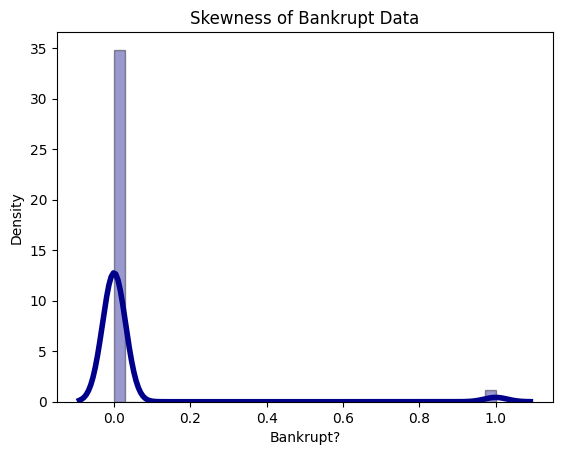

In [ ]:
sns.distplot(df['Bankrupt?'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Skewness of Bankrupt Data')
plt.xlabel('Bankrupt?')
plt.ylabel('Density')
plt.show()

In [ ]:
# Counting occurrences of each value in the 'Liability-Assets Flag' column
value_counts = df['Liability-Assets Flag'].value_counts()

# Display the counts
print(value_counts)


0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


<ipython-input-19-3ad0c9b60226>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Liability-Assets Flag'], hist=True, kde=True,


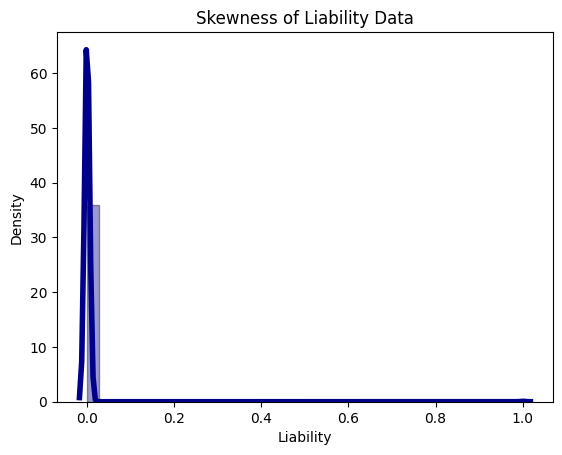

In [ ]:
sns.distplot(df['Liability-Assets Flag'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Skewness of Liability Data')
plt.xlabel('Liability')
plt.ylabel('Density')
plt.show()



### Feature Extraction

#### Correlated Feature Analysis

In [ ]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Liability-Assets Flag  Net Income to Total Assets  \
count            6819.000000                 6819.000000   
mean                0.001173                    0.807760   
std                 0.034234                    0.040332   
min                 0.000000                    0.000000   
25%                 0.000000                    

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

Bankrupt?  \
Bankrupt?                                            1.000000   
ROA(C) before interest and depreciation before ...  -0.260807   
ROA(A) before interest and % after tax              -0.282941   
ROA(B) before interest and depreciation after tax   -0.273051   
Operating Gross Margin                              -0.100043   
...                                                       ...   
Net Income to Stockholder's Equity                  -0.180987   
Liability to Equity                                  0.166812   
Degree of Financial Leverage (DFL)                   0.010508   
Interest Coverage Ratio (Interest expense to EBIT)  -0.005509   
Equity to Liability                                 -0.083048   

                                                    ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807         
ROA(C) before interest and depreciation before ...                                           1.000000         
ROA(A) before interest and % after tax                                                       0.940124         
ROA(B) before interest and depreciation after tax                                            0.986849         
Operating Gross Margin                                                                       0.334719         
...                                                                                               ...         
Net Income to Stockholder's Equity                                                           0.274287         
Liability to Equity                                                                         -0.143629         
Degree of Financial Leverage (DFL)                                                          -0.016575         
Interest Coverage Ratio (Interest expense to EBIT)                                           0.010573         
Equity to Liability                                                                          0.052416         

                                                    ROA(A) before interest and % after tax  \
Bankrupt?                                                                        -0.282941   
ROA(C) before interest and depreciation before ...                                0.940124   
ROA(A) before interest and % after tax                                            1.000000   
ROA(B) before interest and depreciation after tax                                 0.955741   
Operating Gross Margin                                                            0.326969   
...                                                                                    ...   
Net Income to Stockholder's Equity                                                0.291744   
Liability to Equity                                                              -0.141039   
Degree of Financial Leverage (DFL)                                               -0.011515   
Interest Coverage Ratio (Interest expense to EBIT)                                0.013372   
Equity to Liability                                                               0.057887   

                                                    ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051   
ROA(C) before interest and depreciation before ...                                           0.986849   
ROA(A) before interest and % after tax                                                       0.955741   
ROA(B) before interest and depreciation after tax                                            1.000000   
Operating Gross Margin                                                                       0.333749   
...                                                                                               ...   
Net Income to Stockholder's Equity                                        

All three Return On Assets KPIs (ROA(a), ROA(b) and ROA(c) are positively correlated amongst each other.
Net value per share A, B and C are also highly correlated between each other.
‘ Debt ratio %’, ‘ Net worth/Assets’ are negatively correlated.
After tax net interest rate and pre-tax net interest rate are also highly correlated.
‘ Non-industry income and expenditure/revenue’ is negatively correlated with Operating Profit Rate.
‘ Operating Profit Growth Rate’,’ After-tax Net Profit Growth Rate’ and ‘ Regular Net Profit Growth Rate’ are also highly correlated.
‘ Per Share Net profit before tax (Yuan ¥)’ and ‘ Persistent EPS in the Last Four Seasons’ are highly correlated.

In [ ]:

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Select correlations in the upper triangle and stack
correlated_pairs = correlation_matrix.where(mask).abs().stack()

# Filter for high correlations - 0.95
correlated_pairs = correlated_pairs[correlated_pairs > 0.95]
correlated_pairs = correlated_pairs[correlated_pairs < 1]
correlated_pairs = correlated_pairs.sort_values(ascending=False)

correlated_pairs


Debt ratio %                                             Net worth/Assets                                     1.000000
Operating Gross Margin                                   Gross Profit to Sales                                1.000000
Net Value Per Share (A)                                  Net Value Per Share (C)                              0.999837
Operating Gross Margin                                   Realized Sales Gross Margin                          0.999518
Realized Sales Gross Margin                              Gross Profit to Sales                                0.999518
Net Value Per Share (B)                                  Net Value Per Share (A)                              0.999342
                                                         Net Value Per Share (C)                              0.999179
Operating Profit Per Share (Yuan ¥)                      Operating profit/Paid-in capital                     0.998696
After-tax Net Profit Growth Rate                

###### Analysis :

According to above results will keep the columns which has high direct impact on target variable and remove the other one

In [ ]:
# Extracting the correlation of each feature in the pairs with 'Bankrupt?'
correlation_with_bankrupt = correlation_matrix['Bankrupt?']

# Initialize a set to store the features to keep
features_to_remove = set()

# Iterate over each pair and keep the feature with lower correlation to 'Bankrupt?'
for feature1, feature2 in correlated_pairs.index:
    # Get the absolute correlation of each feature with 'Bankrupt?'
    corr_feature1 = abs(correlation_with_bankrupt.get(feature1, 0))
    corr_feature2 = abs(correlation_with_bankrupt.get(feature2, 0))
    # Compare and add the feature with lower correlation to the set
    # Add the feature with higher correlation to the removal set
    if corr_feature1 > corr_feature2:
        features_to_remove.add(feature1)
    else:
        features_to_remove.add(feature2)

df_reduced = df.drop(columns=list(features_to_remove))

# Displaying the names of the removed features
features_to_remove


{'After-tax Net Profit Growth Rate',
 'After-tax net Interest Rate',
 'Borrowing dependency',
 'Gross Profit to Sales',
 'Liability to Equity',
 'Net Income to Total Assets',
 'Net Value Per Share (A)',
 'Net Value Per Share (B)',
 'Net profit before tax/Paid-in capital',
 'Net worth/Assets',
 'Operating Gross Margin',
 'Operating Profit Per Share (Yuan ¥)',
 'Persistent EPS in the Last Four Seasons',
 'Pre-tax net Interest Rate',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax'}

In [ ]:
df.shape

(6819, 95)

In [ ]:
df_reduced.shape

(6819, 79)

#### Correlation of feature with target

In [ ]:
correlation_matrix = df_reduced.corr()

In [ ]:

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Select correlations in the upper triangle and stack
correlated_pairs = correlation_matrix.where(mask).abs().stack()

# Filter for high correlations - 0.95
correlated_pairs = correlated_pairs[correlated_pairs > 0.80]
correlated_pairs = correlated_pairs[correlated_pairs < 1]
correlated_pairs = correlated_pairs.sort_values(ascending=False)

correlated_pairs


Working capitcal Turnover Rate            Cash Flow to Sales                      0.948194
Operating Profit Rate                     Continuous interest rate (after tax)    0.915544
Cash flow rate                            Operating Funds to Liability            0.880562
Per Share Net profit before tax (Yuan ¥)  Operating profit/Paid-in capital        0.858310
Debt ratio %                              Current Liability to Assets             0.842583
dtype: float64

There are 41 features which are highly correlated

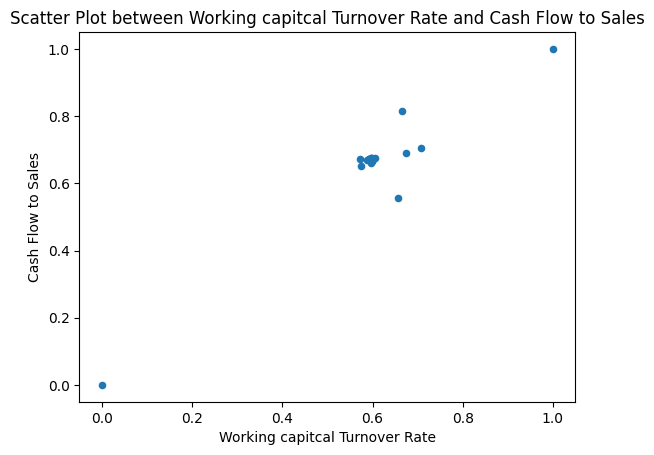

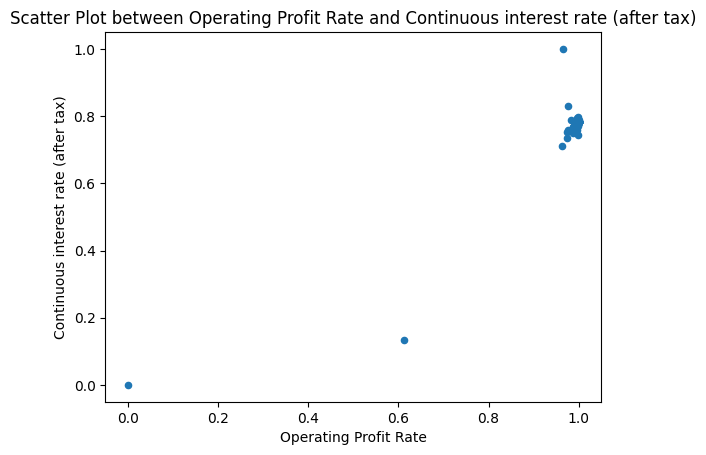

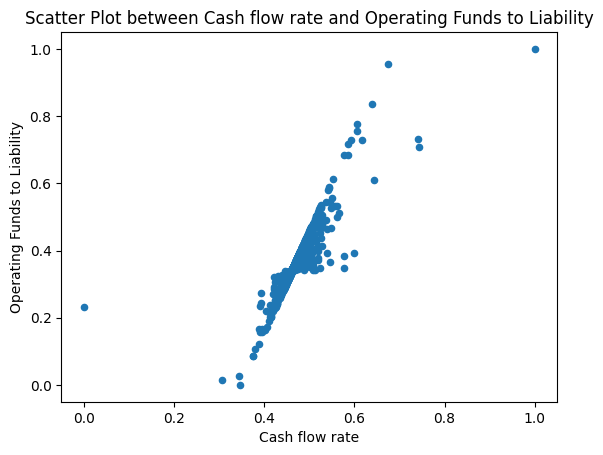

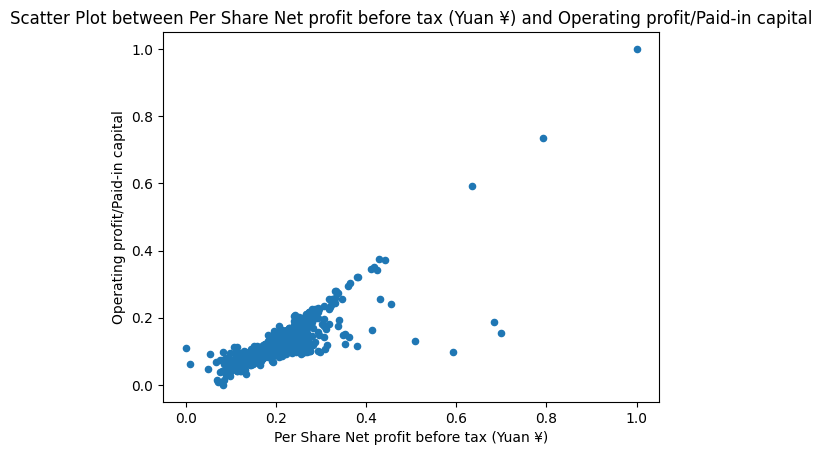

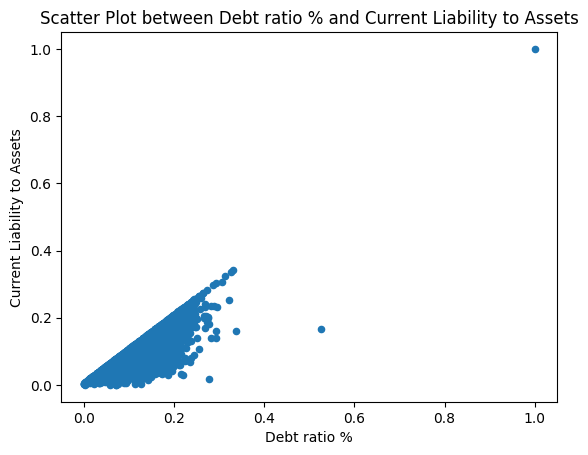

In [ ]:
for pair in correlated_pairs.index:
    df_reduced.plot.scatter(x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


In [ ]:
df_reduced.shape

(6819, 79)

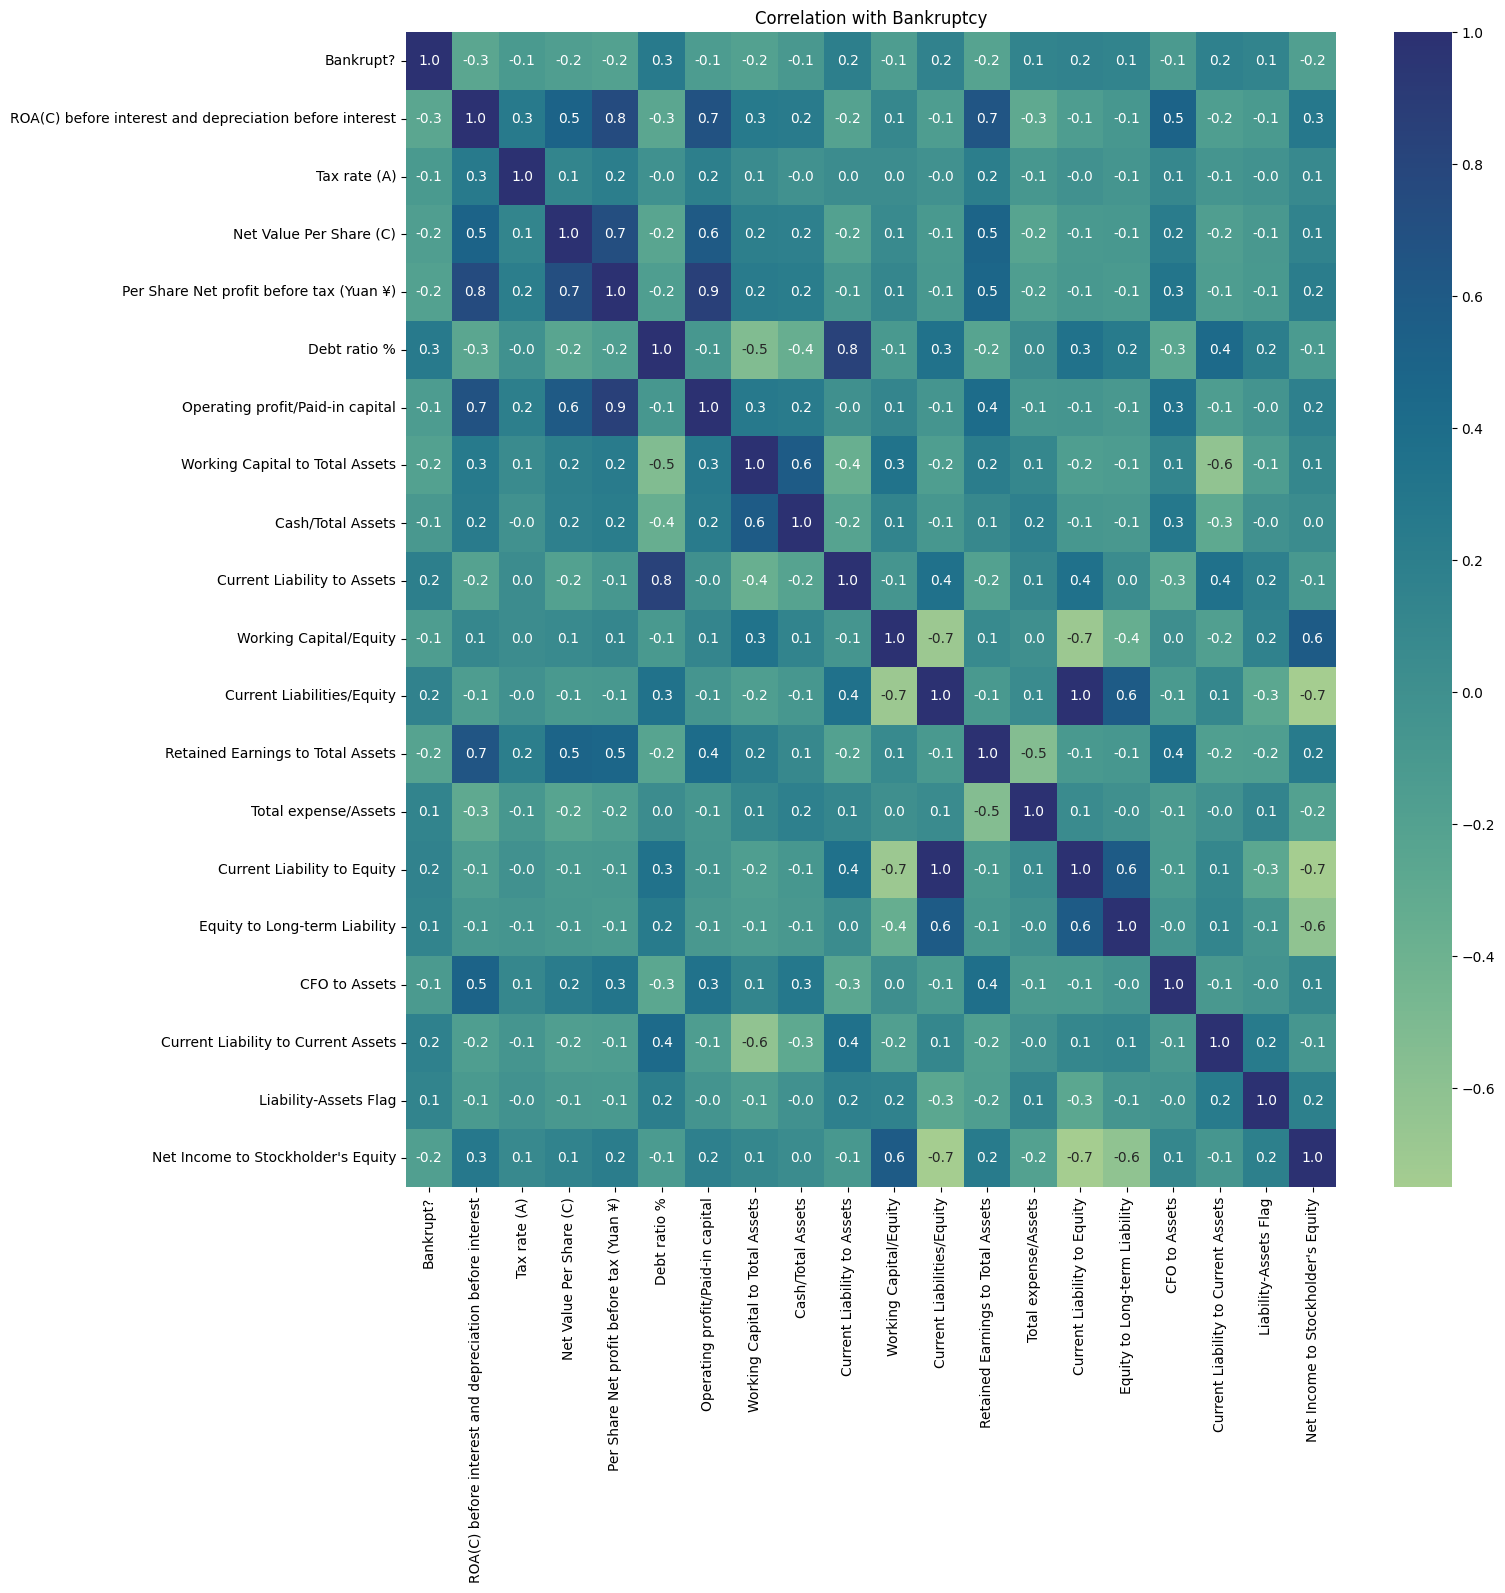

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_reduced.corr()
threshold =  0.1
# Select features that have a correlation greater than 0.10 with "Bankrupt?"
correlated_features = correlation_matrix.index[correlation_matrix["Bankrupt?"].abs() > threshold].tolist()

# Create a new DataFrame with the selected features
corr_test = df_reduced[correlated_features]

# Calculate the correlation matrix for the selected features
corr_matrix = corr_test.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap="crest", annot=True, fmt=".1f")
plt.title("Correlation with Bankruptcy")
plt.show()


From this found that Current Liability to Equity and Current Liability/Equity is same

In [ ]:
# Removing the 'Current Liability to Equity' column from the DataFrame
df_reduced = df_reduced.drop(columns=['Current Liability to Equity'])

# Displaying the first few rows of the updated DataFrame
df_reduced.shape


(6819, 78)

We have columns which have little correlation with target variable (less than 0.1) we will remove that columns

In [ ]:
correlated_features

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'Tax rate (A)',
 'Net Value Per Share (C)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Debt ratio %',
 'Operating profit/Paid-in capital',
 'Working Capital to Total Assets',
 'Cash/Total Assets',
 'Current Liability to Assets',
 'Working Capital/Equity',
 'Current Liabilities/Equity',
 'Retained Earnings to Total Assets',
 'Total expense/Assets',
 'Current Liability to Equity',
 'Equity to Long-term Liability',
 'CFO to Assets',
 'Current Liability to Current Assets',
 'Liability-Assets Flag',
 "Net Income to Stockholder's Equity"]

In [ ]:
len(correlated_features)

20

In [ ]:
# Create a new DataFrame with only the specified columns
df_selected = df[correlated_features]

# Display the first few rows of the new DataFrame
df_selected.shape

(6819, 20)

### Visualization of Extracted Data

In [ ]:
def plot_histograms_side_by_side(df, features):
    """
    Plots histograms of the specified features side by side.

    :param df: DataFrame containing the features.
    :param features: List of feature names to plot.
    """
    num_features = len(features)
    sns.set(style="whitegrid")

    # Determine the layout of the subplots
    nrows = num_features // 2 + num_features % 2
    ncols = 2

    # Create a large figure to hold all subplots
    plt.figure(figsize=(10, nrows* 5))

    for i, feature in enumerate(features):
        plt.subplot(nrows, ncols, i + 1)
        sns.histplot(df[feature], kde=True, color=sns.color_palette("flare", 5)[-1])
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

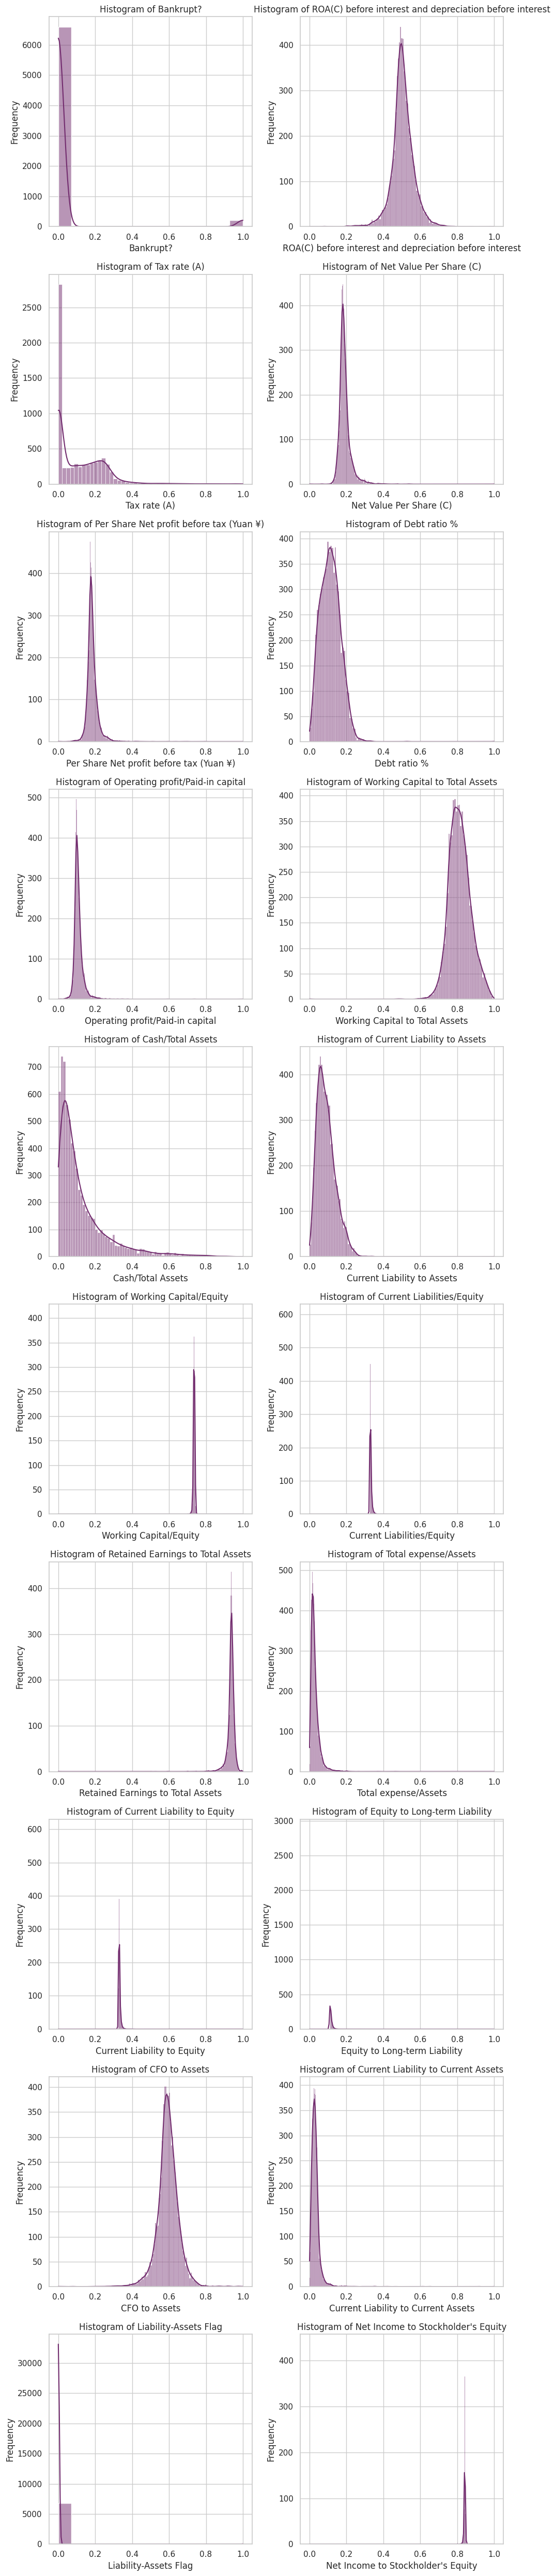

In [ ]:
features = list(df_selected.columns)
plot_histograms_side_by_side(df_selected, features)

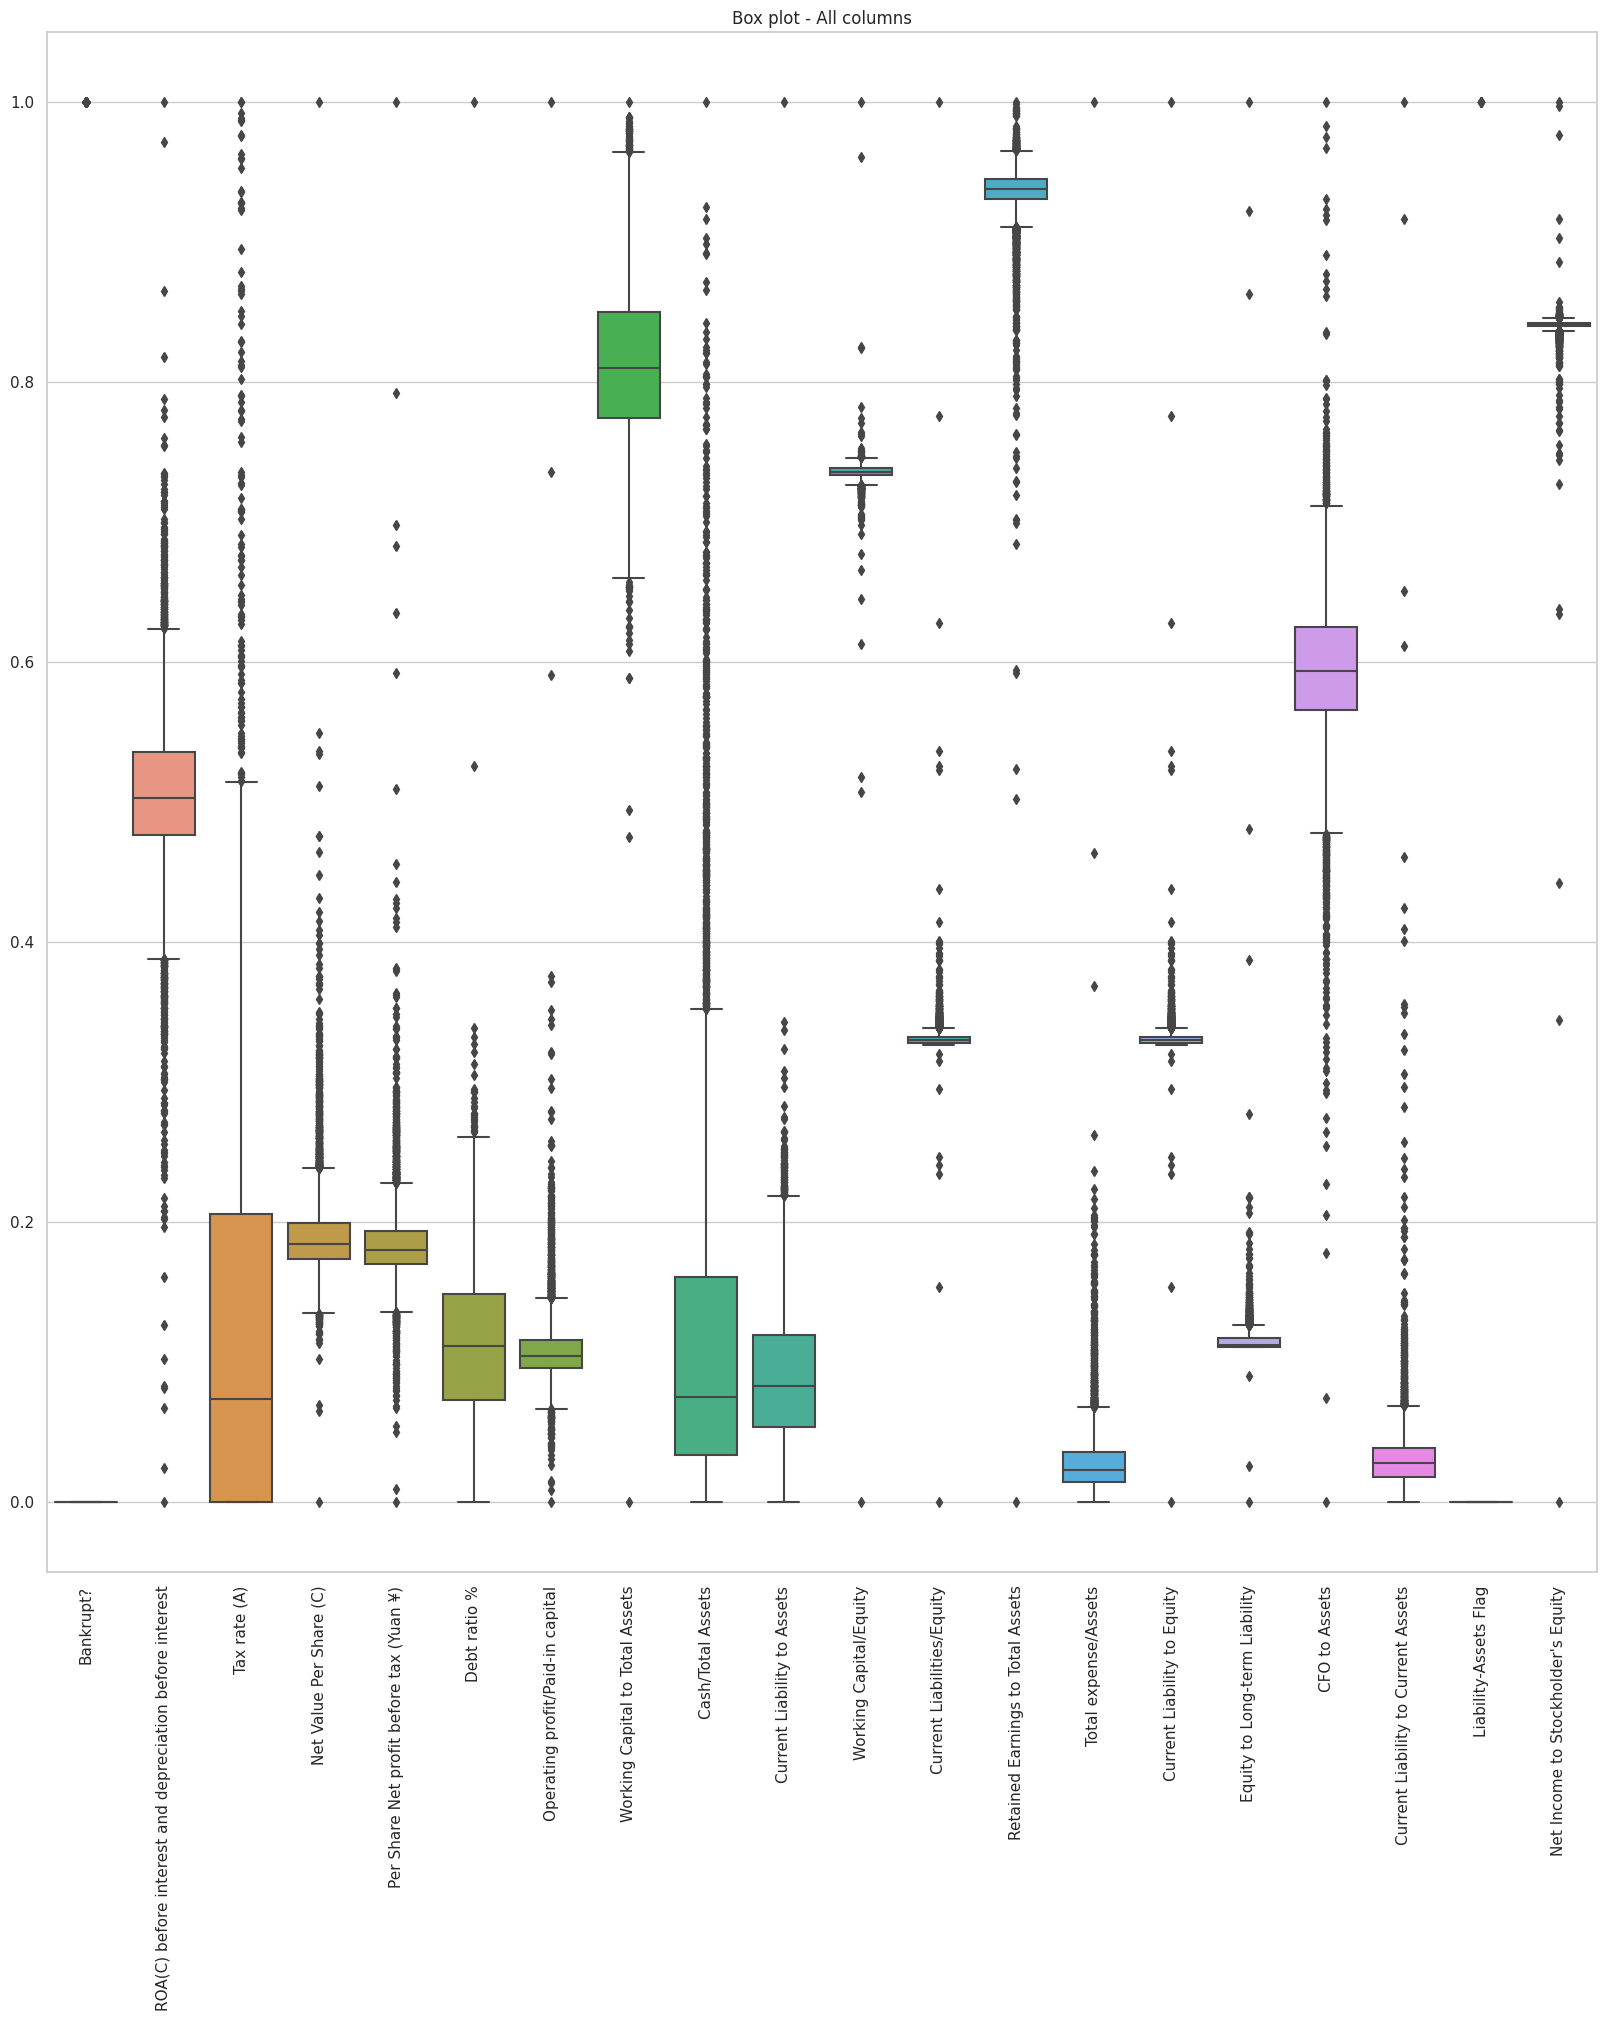

In [ ]:
# Box plot
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_selected)
plt.xticks(rotation=90)
plt.title("Box plot - All columns")
plt.show()

In [ ]:
# Box plot with respect to another feature
def plot_feature_to_the_target(data, features_list, target):
    n_rows = len(features_list) // 4 + int(len(features_list) % 4 > 0)
    n_cols = min(len(features_list), 4)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 3.75, n_rows * 3), squeeze=False)

    axes_flat = axes.flatten()

    for idx, feat in enumerate(features_list):
        ax = axes_flat[idx]
        sns.boxplot(x=target, y=feat, data=data, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel(feat)

    for idx in range(len(features_list), n_rows * n_cols):
        axes_flat[idx].set_visible(False)

    fig.suptitle('Features Relationship with the Target Variable', size=20)
    plt.tight_layout()
    plt.show()

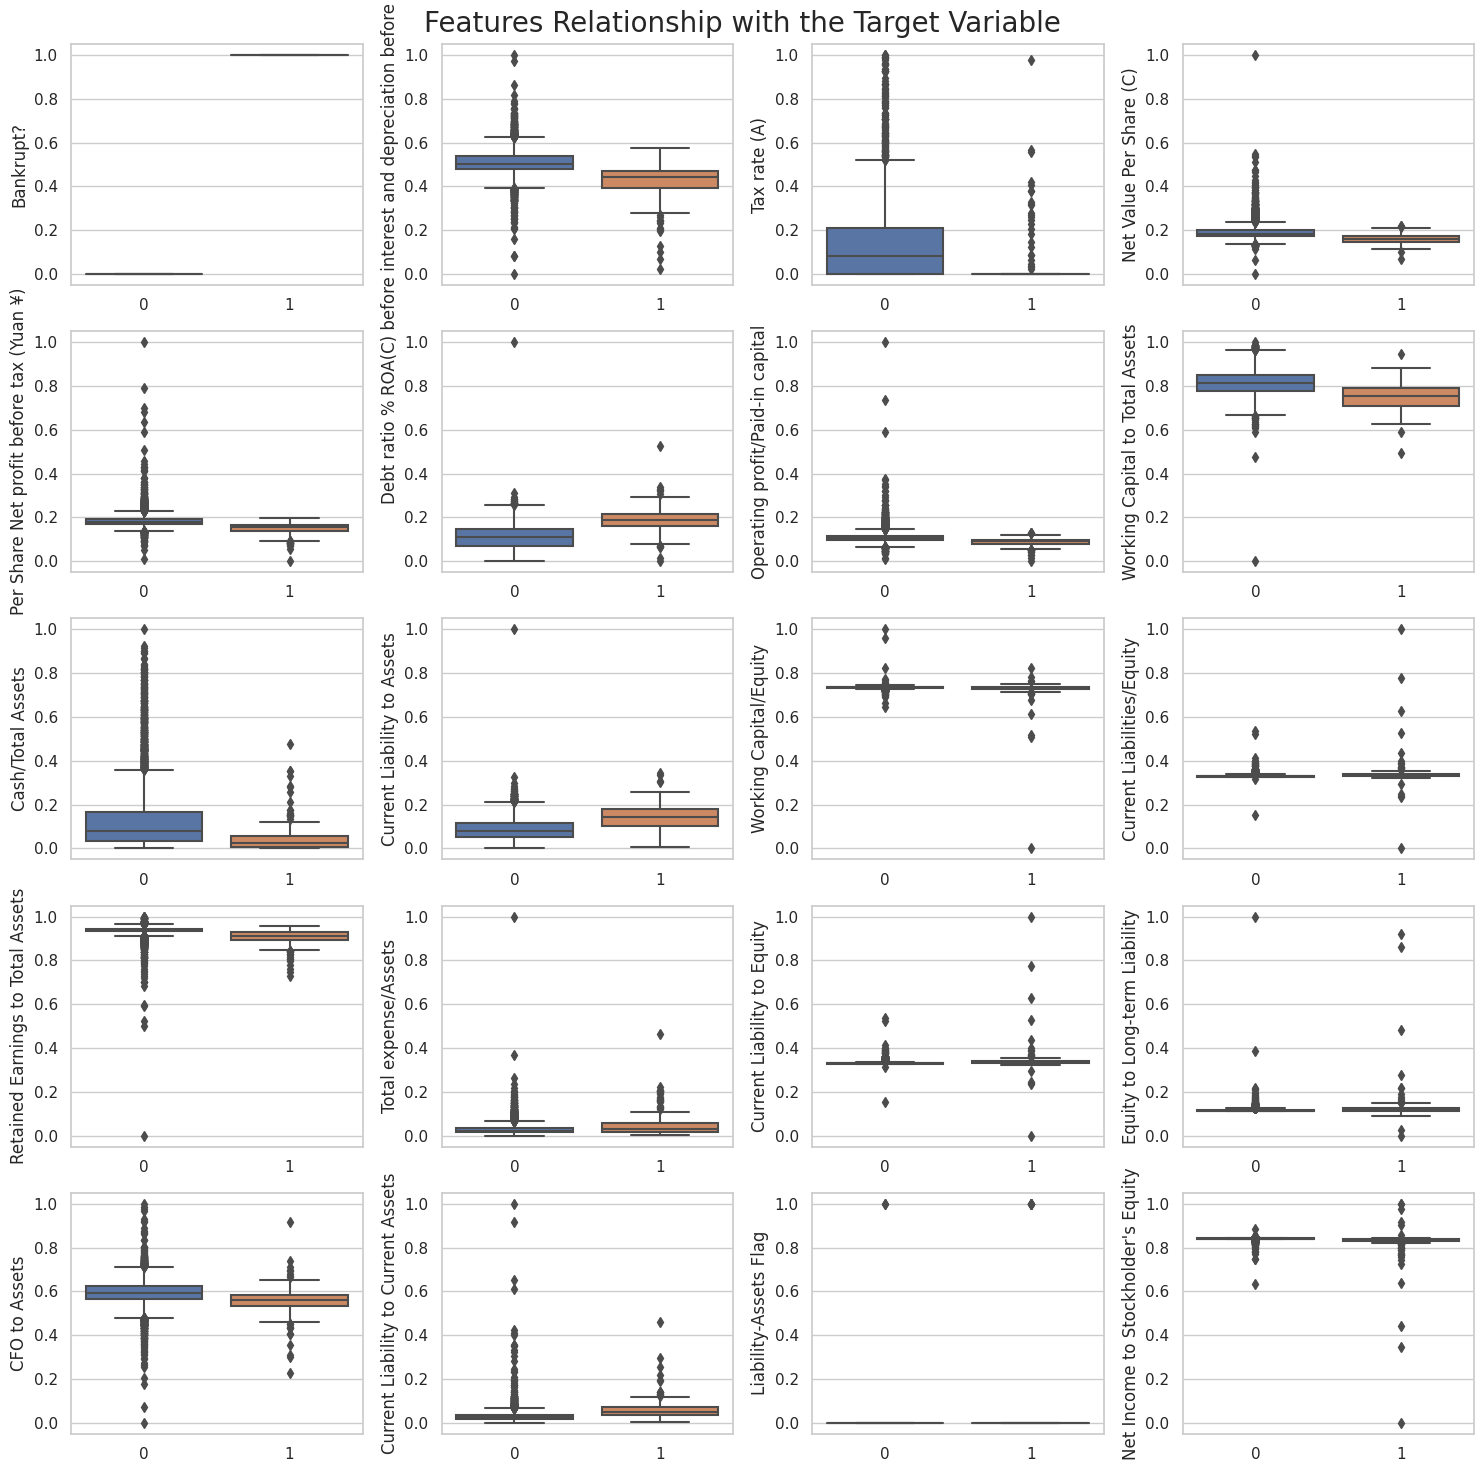

In [ ]:
plot_feature_to_the_target(df_selected, features, "Bankrupt?")

To analyse pair wise scatter plot

In [ ]:
pp = sns.pairplot(df_selected[features], height=2.5, aspect=2.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

The important features are extracted and from visualization extracted the nature of data.

## Data Preprocessing

In [ ]:
df_selected

Bankrupt?  ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594         
1             1                                           0.464291         
2             1                                           0.426071         
3             1                                           0.399844         
4             1                                           0.465022         
...         ...                                                ...         
6814          0                                           0.493687         
6815          0                                           0.475162         
6816          0                                           0.472725         
6817          0                                           0.506264         
6818          0                                           0.493053         

      Tax rate (A)  Net Value Per Share (C)  \
0         0.000000                 0.147950   
1         0.000000                 0.182251   
2         0.000000                 0.193713   
3         0.000000                 0.154187   
4         0.000000                 0.167502   
...            ...                      ...   
6814      0.113372                 0.175045   
6815      0.371596                 0.181324   
6816      0.490839                 0.269521   
6817      0.181294                 0.213392   
6818      0.000000                 0.220766   

      Per Share Net profit before tax (Yuan ¥)  Debt ratio %  \
0                                     0.138736      0.207576   
1                                     0.169918      0.171176   
2                                     0.142803      0.207516   
3                                     0.148603      0.151465   
4                                     0.168412      0.106509   
...                                        ...           ...   
6814                                  0.172102      0.124618   
6815                                  0.172780      0.099253   
6816                                  0.173232      0.038939   
6817                                  0.185584      0.086979   
6818                                  0.182119      0.014149   

      Operating profit/Paid-in capital  Working Capital to Total Assets  \
0                             0.095885                         0.672775   
1                             0.093743                         0.751111   
2                             0.092318                         0.829502   
3                             0.077727                         0.725754   
4                             0.096927                         0.751822   
...                                ...                              ...   
6814                          0.098222                         0.817769   
6815                          0.098572                         0.793387   
6816                          0.100103                         0.866047   
6817                          0.111722                         0.832340   
6818                          0.092465                         0.873759   

      Cash/Total Assets  Current Liability to Assets  Working Capital/Equity  \
0              0.004094                     0.147308                0.721275   
1              0.014948                     0.056963                0.731975   
2              0.000991                     0.098162                0.742729   
3              0.018851                     0.098715                0.729825   
4              0.014161                     0.110195                0.732000   
...                 ...                          ...                     ...   
6814           0.099481                     0.103838                0.736716   
6815           0.080337                     0.089901                0.734584   
6816           0.412885                     0.024414                0.737432   
6817           0.112238                     0.083199      

#### Train Test Split

In [ ]:
# Splitting the data into features (X) and target (y)
X = df_selected.drop('Bankrupt?', axis=1)  # Features
y = df_selected['Bankrupt?']  # Target

# Splitting the dataset into training and testing sets
# Here, 20% of the data is reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5455, 19) (1364, 19) (5455,) (1364,)


#### SMOTE Analysis

In [ ]:
def plot_fetuare_distribution(df, feature_name):
  sns.distplot(df[feature_name], hist=True, kde=True,
              bins=int(180/5), color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth': 4})

  plt.title(f'Skewness of {feature_name} Data')
  plt.xlabel(f'{feature_name}')
  plt.ylabel('Density')
  plt.show()

<ipython-input-44-ad3d3c9589f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature_name], hist=True, kde=True,


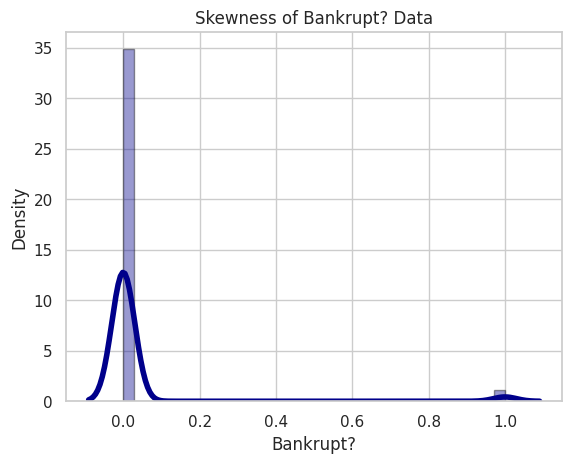

In [ ]:
column_name ="Bankrupt?"
plot_fetuare_distribution(df_selected, column_name)

##### Need of SMOTE

Addressing Imbalance: The imbalance nature of Bankrupt target variable can lead to poor model performance, as the model might become biased towards the majority class. SMOTE helps to counter this by generating synthetic samples for the minority class, thereby balancing the class distribution.

Synthetic Sample Generation: Unlike simple random oversampling, SMOTE generates synthetic samples that are plausible within the feature space. This means the synthetic samples are not just copies of existing minority instances but are new data points, generated by interpolation between existing ones. This leads to a richer, more diverse dataset.

Preventing Overfitting: Directly duplicating minority instances can lead to overfitting, as the model might just memorize these instances. With synthetic samples, there is more generalization which helps in preventing this issue.

Compatibility with Various Models: SMOTE is an effective preprocessing step that can be paired with different classifiers, providing flexibility in model selection and experimentation.

Enabling More Robust Validation: With a balanced dataset, techniques like k-fold cross-validation become more meaningful. The metrics obtained from validation are more reliable, as they reflect the model's performance across both classes more accurately.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def oversample_data(X, y):
    # Create an instance of SMOTE with a fixed random state
    smote = SMOTE(random_state=8)

    # Print class distribution before oversampling
    print("Before oversampling: ", Counter(y))

    # Apply SMOTE to oversample the data
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Print class distribution after oversampling
    print("After oversampling: ", Counter(y_resampled))

    return X_resampled, y_resampled

# Apply oversampling to unscaled train and test data
X_train_resampled, y_train_resampled = oversample_data(X_train, y_train)
X_test_resampled, y_test_resampled = oversample_data(X_test, y_test)


Before oversampling:  Counter({0: 5286, 1: 169})
After oversampling:  Counter({0: 5286, 1: 5286})
Before oversampling:  Counter({0: 1313, 1: 51})
After oversampling:  Counter({0: 1313, 1: 1313})


### Standardization



In [ ]:
def scale_data(X_train, X_test):
    """
    Scales the training and test sets using StandardScaler.

    :param X_train: Training set features
    :param X_test: Test set features
    :return: Scaled versions of X_train and X_test
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

# Usage
X_train_scaled, X_test_scaled = scale_data(X_train_resampled, X_test_resampled)


### PCA (Principle Component Analysis)

In [ ]:
def apply_pca(X_train, X_test, n_components=2):
    """
    Applies PCA on the training and test sets.

    :param X_train: Training set features
    :param X_test: Test set features
    :param n_components: Number of principal components to keep
    :return: Transformed X_train and X_test, and explained variance ratio
    """
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    explained_variance = pca.explained_variance_ratio_

    return X_train_pca, X_test_pca, explained_variance

# Usage
X_train_pca, X_test_pca, explained_variance = apply_pca(X_train_scaled, X_test_scaled, 2 )


In [ ]:
explained_variance

array([0.36007345, 0.18525222])

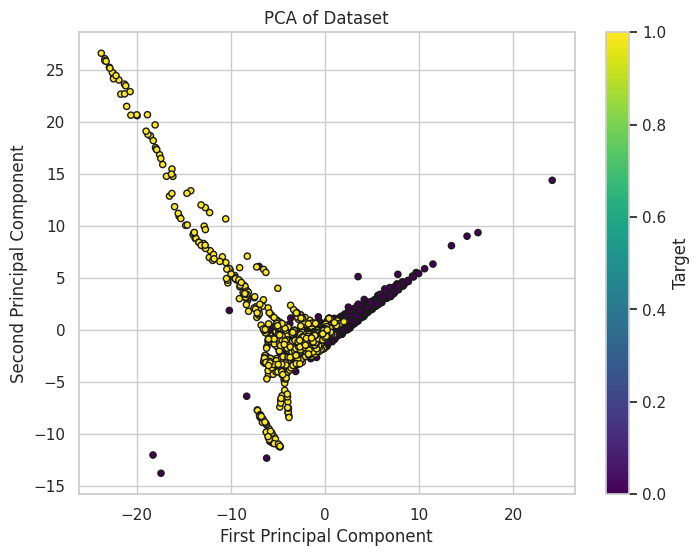

In [ ]:
import matplotlib.pyplot as plt

def visualize_pca(X_pca, y, title="PCA of Dataset"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.colorbar(scatter, label='Target')
    plt.show()

# Example usage:
visualize_pca(X_train_pca, y_train_resampled)


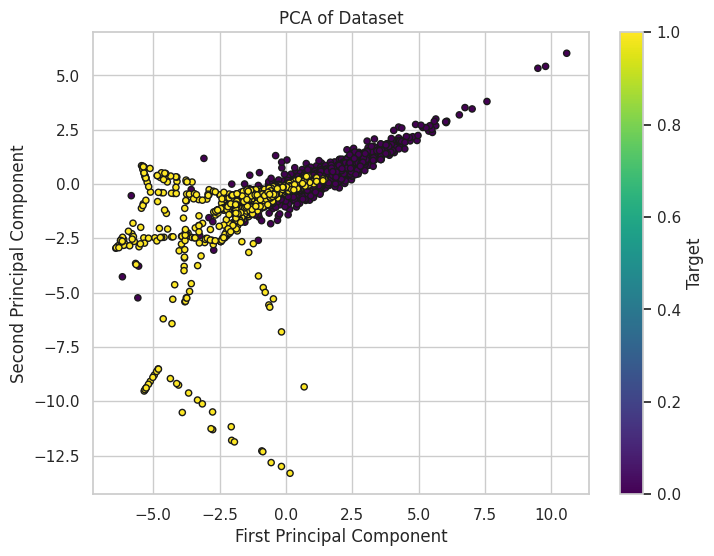

In [ ]:
visualize_pca(X_test_pca, y_test_resampled)

## Model Training

### Evaluation implementation

In [ ]:
def predict(model, X_test):
    return model.predict(X_test)

In [ ]:
def display_metrics(metrics):
    """
    Displays the metrics in a table format.

    :param metrics: Dictionary containing evaluation metrics
    """
    table = PrettyTable()
    table.field_names = ["Metric", "Value"]
    for key, value in metrics.items():
        table.add_row([key, value])

    print(table)


In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the given model on the test set and returns various metrics.

    :param model: The trained machine learning model
    :param X_train: Training set features
    :param y_train: Training set target variable
    :param X_test: Test set features
    :param y_test: Test set target variable
    :return: Dictionary containing various evaluation metrics
    """
    # Measure the training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        "Training Time (seconds)": training_time,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=True),
        "Recall": recall_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_proba),
        "Log Loss (Cross Entropy)": log_loss(y_test, y_pred_proba)
    }

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

    display_metrics(metrics)

    return metrics


In [ ]:
def generate_confusion_matrix(model, X_test, y_test):
    """
    Generates and displays a confusion matrix for the given model and test data.

    :param model: Trained machine learning model
    :param X_test: Test set features
    :param y_test: Test set target variable
    """
    matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    plt.title('Confusion matrix for our classifier')
    plt.show()


In [ ]:
model_metrics = {}

### Support Vector Machine (SVM)

#### SVM Performance with PCA & Data Balancing (SMOT)

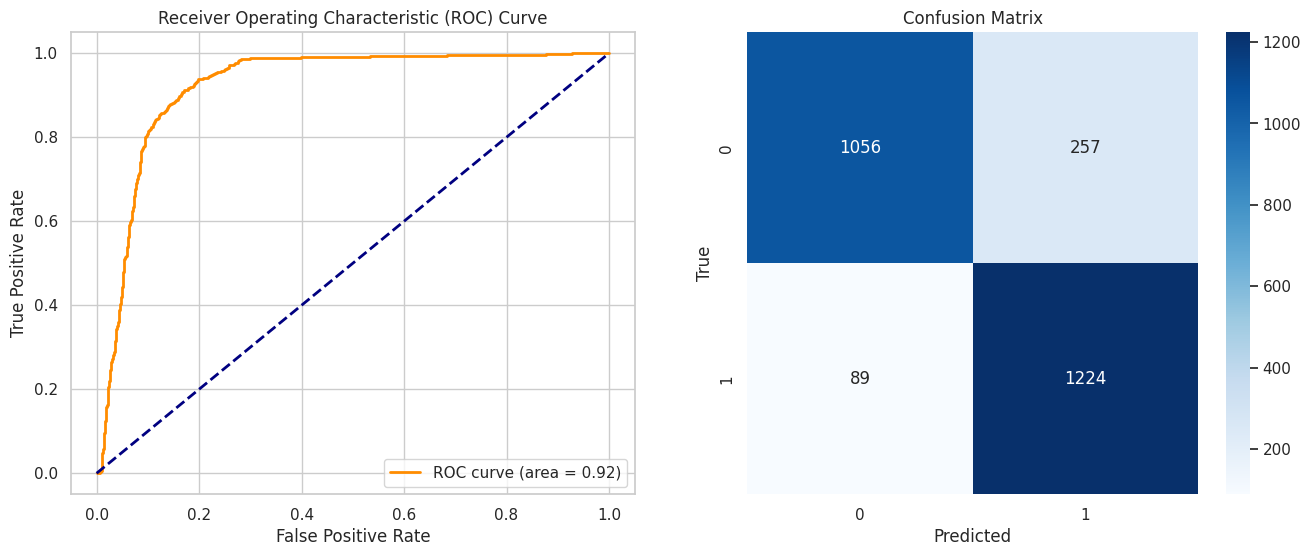

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 12.708370208740234 |
|         Accuracy         | 0.8682406702208683 |
|         F1 Score         | 0.8761632068718682 |
|        Precision         | 0.8264686022957461 |
|          Recall          | 0.9322162985529322 |
|         AUC-ROC          | 0.922783994375769  |
| Log Loss (Cross Entropy) | 0.3314641488049229 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_resampled
X_test_ = X_test_pca
y_test_ = y_test_resampled

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_PCA'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_, y_test_)

#### Analysis of SVM with PCA and Data Balancing:

**Training Time:** The model took approximately 12.71 seconds to train, which indicates a reasonable training duration, balancing efficiency with the complexity introduced by PCA and data balancing.

**Accuracy:** High accuracy of about 86.82% suggests that the model performs well on the balanced and dimensionality-reduced data.

**F1 Score:** An F1 score of 87.61% indicates a good balance between precision and recall, which is often challenging to achieve in classification tasks.
Precision and Recall: High precision (82.65%) and even higher recall (93.22%) suggest the model is reliable at identifying the positive class and does not miss many positive instances.

**AUC-ROC:** The AUC-ROC score is very high at 92.28%, showing excellent model discrimination capacity between positive and negative classes.
Log Loss (Cross Entropy): A low log loss of 0.331 implies good model confidence in its predictions.

#### SVM without PCA & SMOT (Data Balancing)

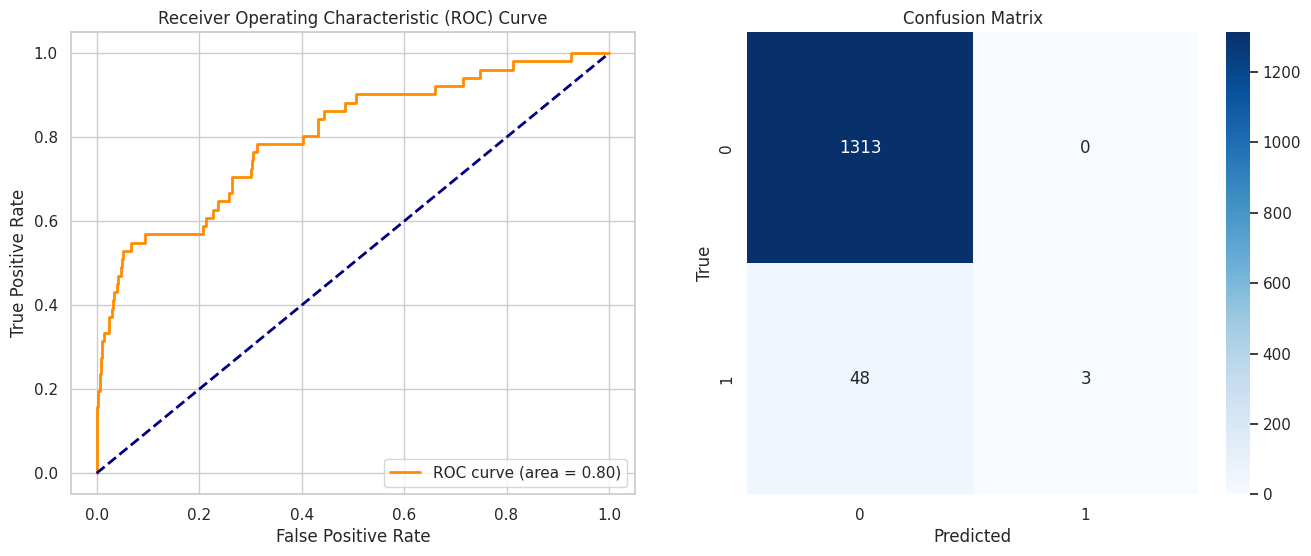

+--------------------------+----------------------+
|          Metric          |        Value         |
+--------------------------+----------------------+
| Training Time (seconds)  |  2.0164167881011963  |
|         Accuracy         |  0.9648093841642229  |
|         F1 Score         |  0.1111111111111111  |
|        Precision         |         1.0          |
|          Recall          | 0.058823529411764705 |
|         AUC-ROC          |  0.802637277302391   |
| Log Loss (Cross Entropy) | 0.14995707898660382  |
+--------------------------+----------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_W/O_PCA_BALANCED'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_, y_test_)

#### Analysis of SVM without PCA and Data Balancing:

**Training Time:** Significantly shorter training time at approximately 2.02 seconds, likely due to the absence of PCA processing.

**Accuracy:** Excellent accuracy at 96.48%, indicating very effective classification on the unbalanced, non-transformed data.

**F1 Score:** The F1 score is extremely low at 11.11%, which is concerning and suggests that while the model is accurate overall, it may not be effective at classifying the minority class.

**Precision and Recall:** Precision is perfect at 1.0, but recall is very low at 5.88%, which means the model is very conservative in predicting the positive class and misses out on many actual positives.

**AUC-ROC:** The AUC-ROC score is lower at 80.26%, reflecting a decreased ability to differentiate between the classes compared to the PCA-balanced model.

**Log Loss (Cross Entropy):** The log loss is low at 0.150, which is excellent but should be considered in the context of the model's precision-recall trade-off.


#### SVM with SMOT (Data Balancing)

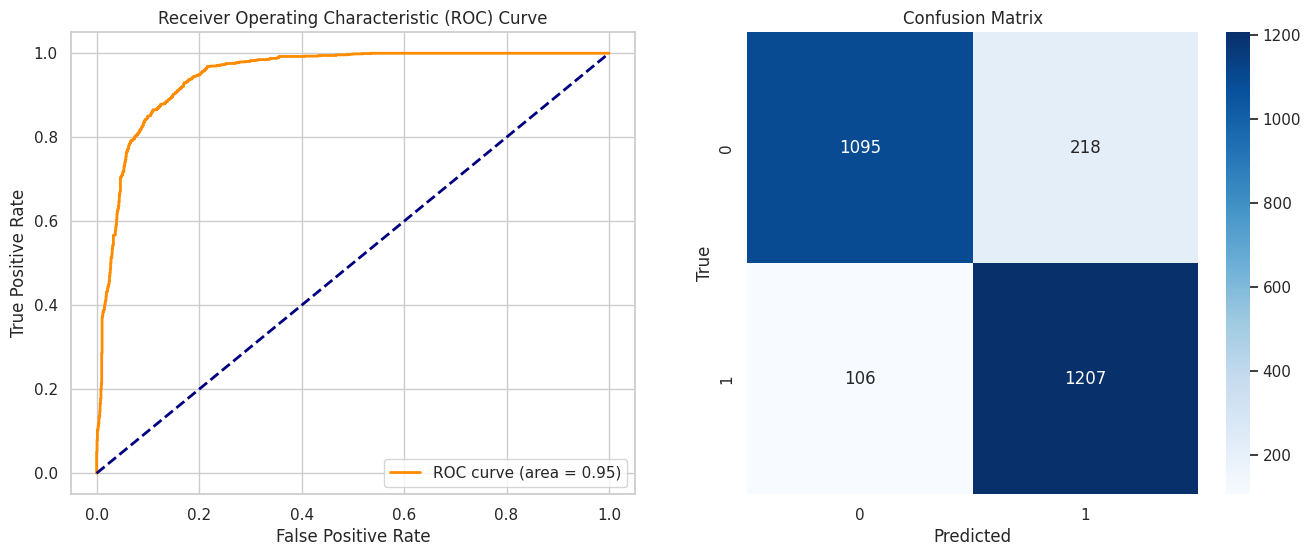

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 18.712966680526733 |
|         Accuracy         | 0.8766184310738766 |
|         F1 Score         | 0.8816654492330168 |
|        Precision         | 0.8470175438596491 |
|          Recall          | 0.9192688499619193 |
|         AUC-ROC          | 0.947695115167384  |
| Log Loss (Cross Entropy) | 0.2946996911405095 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_resampled
y_train_ = y_train_resampled
X_test_ = X_test_resampled
y_test_ = y_test_resampled

svm_clf = SVC(kernel='rbf', probability=True, random_state=123)
model_metrics['SVM_W/O_PCA_IMBALANCED'] = evaluate_model(svm_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of SVM without PCA and with Data Balancing:**



**Training Time:** The longest training time at approximately 18.71 seconds, which might be due to the complexity of dealing with more features and balancing the data.

**Accuracy:** A solid accuracy of 87.66%, indicating that the model is quite accurate even without PCA.

**F1 Score:** The F1 score is high at 88.17%, suggesting a good balance between precision and recall, similar to the PCA-balanced model.

**Precision and Recall:** Precision (84.70%) and recall (91.93%) are both high, showing the model’s effectiveness at classifying the positive class without being overly conservative.

**AUC-ROC:** An excellent AUC-ROC score of 94.77% demonstrates the model's strong discriminatory power.

**Log Loss (Cross Entropy):** A slightly higher log loss at 0.295, indicating reasonable confidence in its predictions.

### **Cumulative Analysis:**

Comparing the three models, the SVM without PCA and with data balancing shows a good trade-off between training time and model performance metrics, suggesting that balancing is crucial for SVM performance on this dataset. The SVM with PCA and data balancing performs similarly in terms of F1 score, precision, recall, and AUC-ROC but takes less time to train. However, the SVM without PCA and data balancing appears to be the most robust model overall, given its high scores across accuracy, F1 score, precision, recall, and AUC-ROC, despite a longer training time. The trade-offs suggest that while PCA can help in reducing complexity and training time, careful consideration must be given to balancing to ensure good model performance across all metrics.

### Random Forest

#### Random Forest with PCA & SMOT

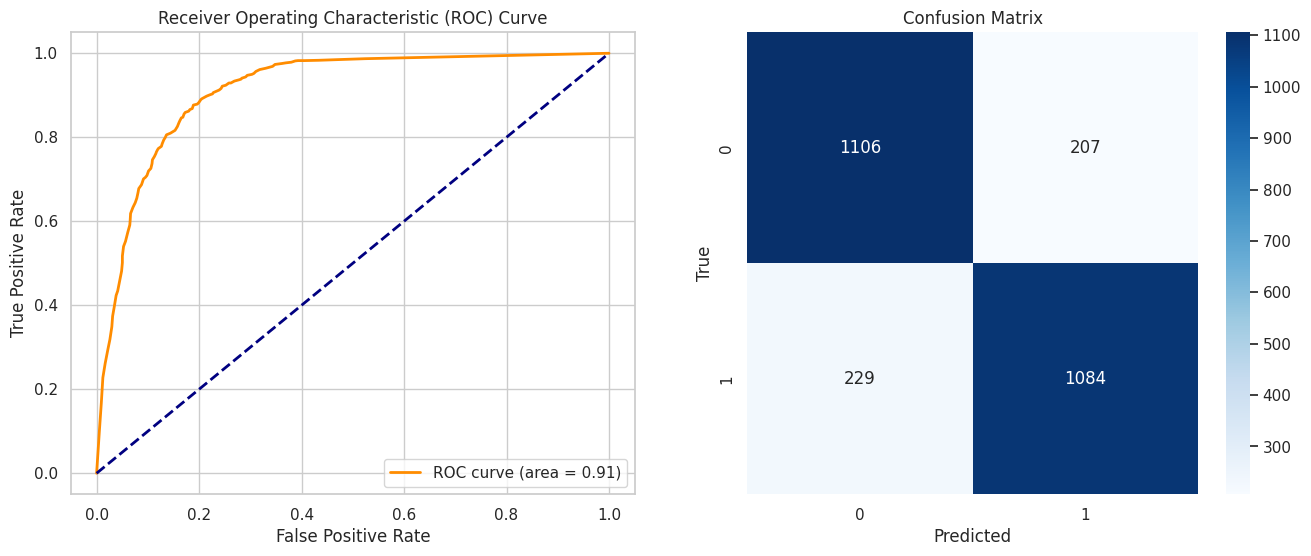

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 3.2441306114196777 |
|         Accuracy         | 0.8339680121858339 |
|         F1 Score         | 0.8325652841781874 |
|        Precision         | 0.8396591789310612 |
|          Recall          | 0.8255902513328256 |
|         AUC-ROC          | 0.9124433211966109 |
| Log Loss (Cross Entropy) | 0.6687750735115898 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_resampled
X_test_ = X_test_pca
y_test_ = y_test_resampled

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_PCA'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of Random Forest with PCA and Data Balancing:**

**Training Time:** Moderate training time at approximately 3.24 seconds, likely due to the reduced feature space from PCA, coupled with data balancing.

**Accuracy:** Decent accuracy of about 83.40%, which is relatively lower compared to the other models, indicating some loss of information due to PCA.

**F1 Score:** A strong F1 score of 83.26% shows a balanced harmonic mean between precision and recall.

**Precision and Recall:** Precision is high at 83.97%, with a slightly lower recall at 82.56%, suggesting the model is more conservative with positive class predictions.

**AUC-ROC:** A high AUC-ROC of 91.24% indicates good model discrimination ability.

**Log Loss (Cross Entropy):** Higher log loss at 0.669, implying less confidence in probability estimates compared to the non-PCA model.

#### Random Forest without PCA & SMOT



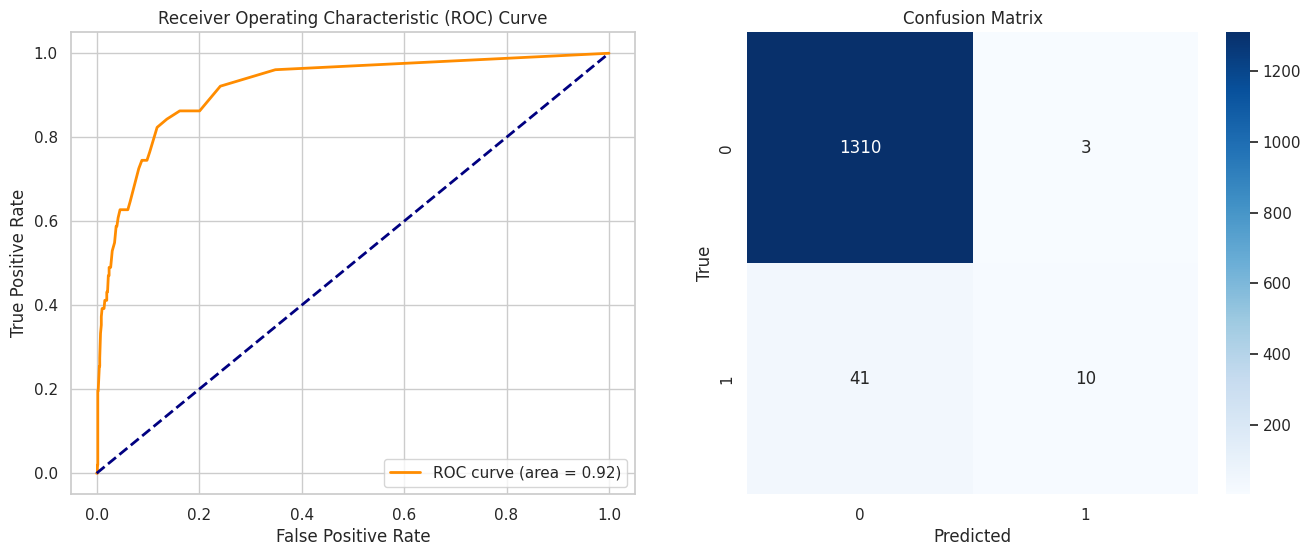

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  2.4538381099700928 |
|         Accuracy         |  0.967741935483871  |
|         F1 Score         | 0.31250000000000006 |
|        Precision         |  0.7692307692307693 |
|          Recall          | 0.19607843137254902 |
|         AUC-ROC          |  0.9176858862356825 |
| Log Loss (Cross Entropy) | 0.14360376285779908 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_W/O_PCA_BALANCED'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of RF without PCA and Data Balancing:**

**Training Time:** Fastest training time at approximately 2.45 seconds, benefiting from the absence of PCA processing and data balancing.

**Accuracy:** Excellent accuracy of 96.77%, suggesting that the model can classify instances correctly most of the time.

**F1 Score:** The F1 score is quite low at 31.25%, indicating a poor balance between precision and recall for the positive class.

**Precision and Recall:** High precision at 76.92%, but low recall at 19.61%, demonstrating the model’s predictive conservatism and its tendency to miss positive cases.

**AUC-ROC:** A very good AUC-ROC score of 91.77%, indicating strong classification capabilities.

**Log Loss (Cross Entropy):** A low log loss of 0.144, signifying reasonable certainty in predictions despite the imbalance.

#### Random Forest with SMOT

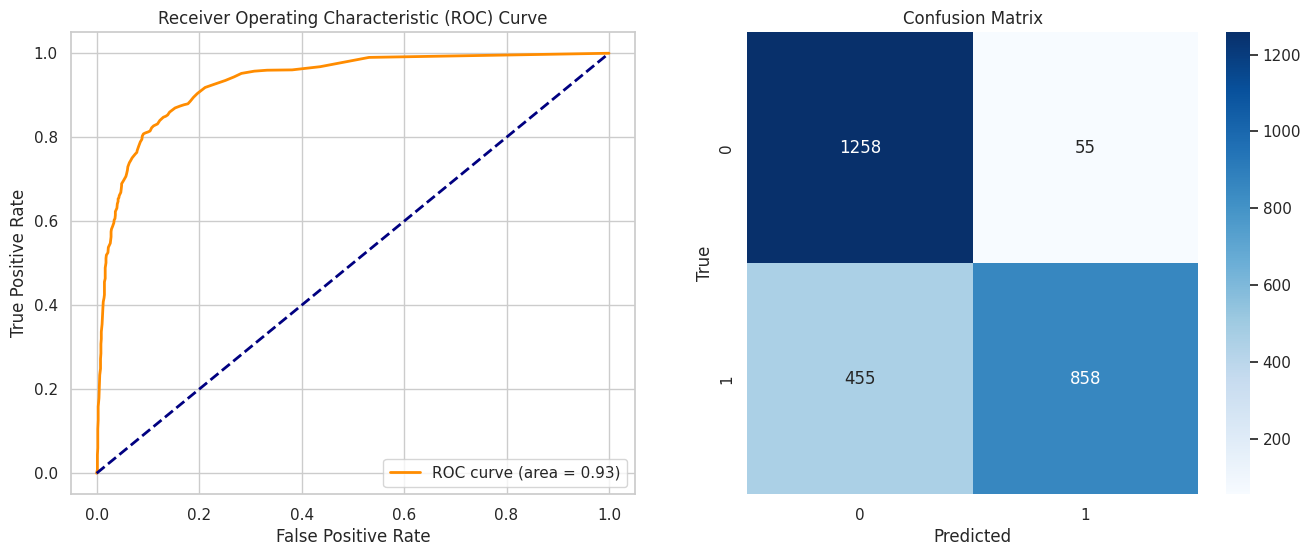

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 9.384443521499634  |
|         Accuracy         | 0.8057882711348058 |
|         F1 Score         |  0.77088948787062  |
|        Precision         | 0.9397590361445783 |
|          Recall          | 0.6534653465346535 |
|         AUC-ROC          | 0.9324866050375615 |
| Log Loss (Cross Entropy) | 0.6319345566203213 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_resampled
y_train_ = y_train_resampled
X_test_ = X_test_resampled
y_test_ = y_test_resampled

rf_clf = RandomForestClassifier(random_state=123)
model_metrics['RF_W/O_PCA_IMBALANCED'] = evaluate_model(rf_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of RF without PCA and with Data Balancing:**

**Training Time:** The longest training time at approximately 9.38 seconds, which might be due to the additional complexity from data balancing.

**Accuracy:** Lower accuracy at 80.58%, suggesting that the balancing process without PCA may not be as beneficial for this model.

**F1 Score:** A high F1 score of 77.09%, indicating a good balance between precision and recall when the data is balanced.

**Precision and Recall:** Very high precision at 93.98% with a lower recall at 65.35%, indicating that while the model predicts positive cases well, it still misses a significant number.

**AUC-ROC:** A strong AUC-ROC of 93.25%, demonstrating a good ability to distinguish between classes.

**Log Loss (Cross Entropy):** A log loss of 0.632, showing a good level of confidence in its probability estimates for the balanced data.


### **Cumulative Analysis:**

Comparing all three models, we see that the RF without PCA and data balancing achieves the highest accuracy and AUC-ROC scores, suggesting that for this specific dataset, data balancing without dimensionality reduction is most effective. However, this approach also results in the lowest recall and F1 scores, indicating a potential issue with the model's ability to identify the positive class effectively.

The RF with PCA and data balancing shows a better F1 score, which could imply a more balanced performance in classifying the positive class, even though it has a lower overall accuracy. This might be due to the model's ability to handle reduced complexity after PCA effectively.


### XGBoost

#### XGBoost with PCA & Data Balancing (SMOT)

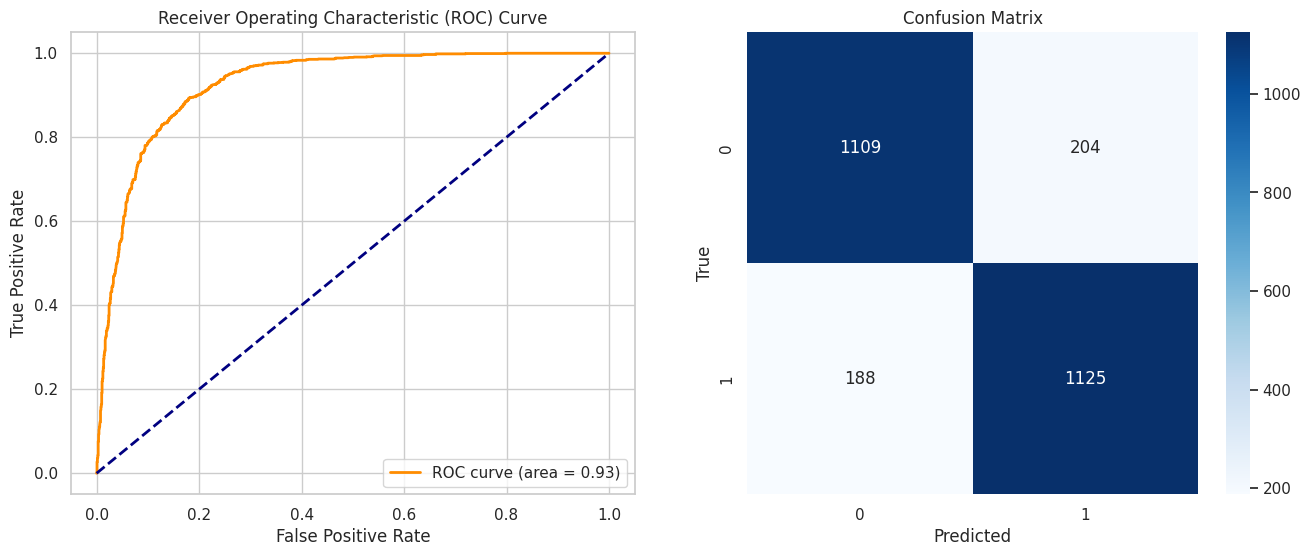

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  0.1476905345916748 |
|         Accuracy         |  0.8507235338918507 |
|         F1 Score         |  0.8516275548826645 |
|        Precision         |  0.8465011286681715 |
|          Recall          |  0.8568164508758568 |
|         AUC-ROC          |  0.9271825653477528 |
| Log Loss (Cross Entropy) | 0.35227141678261714 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_resampled
X_test_ = X_test_pca
y_test_ = y_test_resampled

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_PCA'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of XGBoost with PCA and Data Balancing:**

**Training Time**: Exceptionally quick training time at approximately 0.15 seconds, likely due to the reduced feature space from PCA and efficiency of the XGBoost algorithm.

**Accuracy**: Good accuracy at about 85.07%, which suggests that the model performs well in correctly classifying instances.

**F1 Score**: An F1 score of 85.16% indicates a balanced performance between precision and recall, signifying effectiveness in identifying the positive class.

**Precision and Recall**: Both precision and recall are well-balanced and high (around 84.65% and 85.68%, respectively), demonstrating the model's ability to accurately classify positive cases.

**AUC-ROC**: High AUC-ROC of 92.72%, indicating excellent capability in distinguishing between classes.

**Log Loss (Cross Entropy)**: Moderately low log loss at 0.352, suggesting a reasonable level of confidence in the model's probability estimates.

#### XGBoost without PCA & SMOT

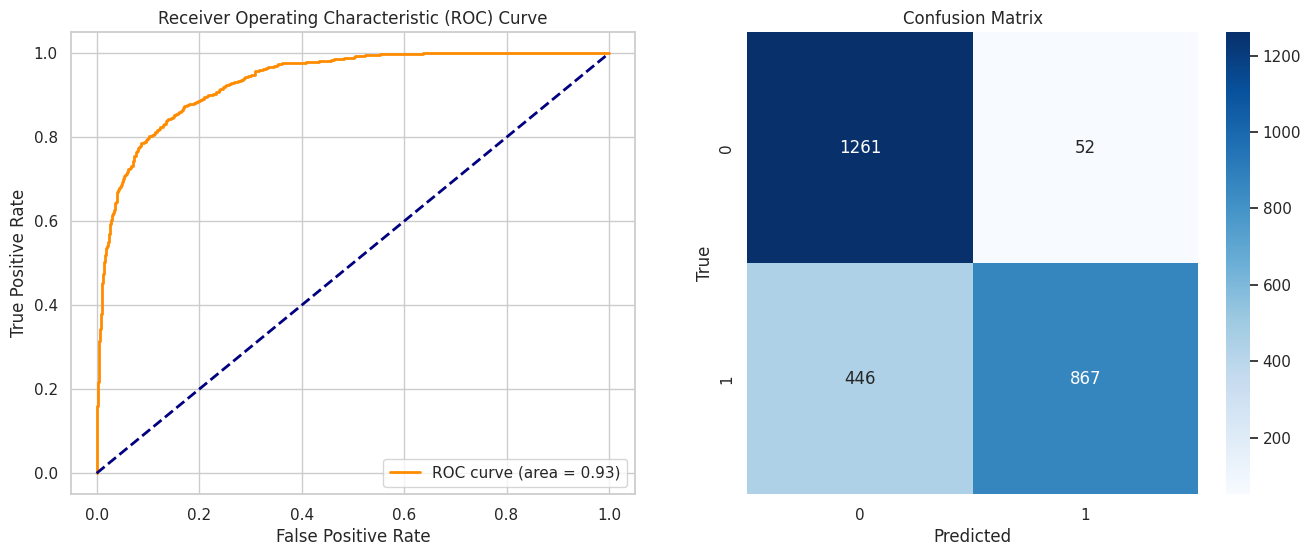

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 3.951380491256714  |
|         Accuracy         | 0.8103579588728104 |
|         F1 Score         | 0.7768817204301075 |
|        Precision         | 0.9434167573449401 |
|          Recall          | 0.6603198781416603 |
|         AUC-ROC          | 0.9349518465819281 |
| Log Loss (Cross Entropy) | 0.7870037202119902 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_resampled
y_train_ = y_train_resampled
X_test_ = X_test_resampled
y_test_ = y_test_resampled

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_W/O_PCA_BALANCED'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of XGBoost without PCA and Data Balancing:**

**Training Time**: Longer training time at about 3.95 seconds, due to the absence of PCA and the complexity of handling unbalanced data.

**Accuracy**: Lower accuracy at 81.04%, indicating some challenges in model performance on the unbalanced dataset.

**F1 Score**: A substantial F1 score of 77.69% reflects a good balance of precision and recall.

**Precision and Recall**: Very high precision at 94.34% and a lower recall at 66.03%, suggesting that the model is more prone to missing positive cases in the unbalanced dataset.

**AUC-ROC**: Strong AUC-ROC of 93.50%, showcasing good class differentiation ability.

**Log Loss (Cross Entropy)**: Higher log loss at 0.787, indicating less certainty in the predictions due to data imbalance.

#### XGBoost with SMOT

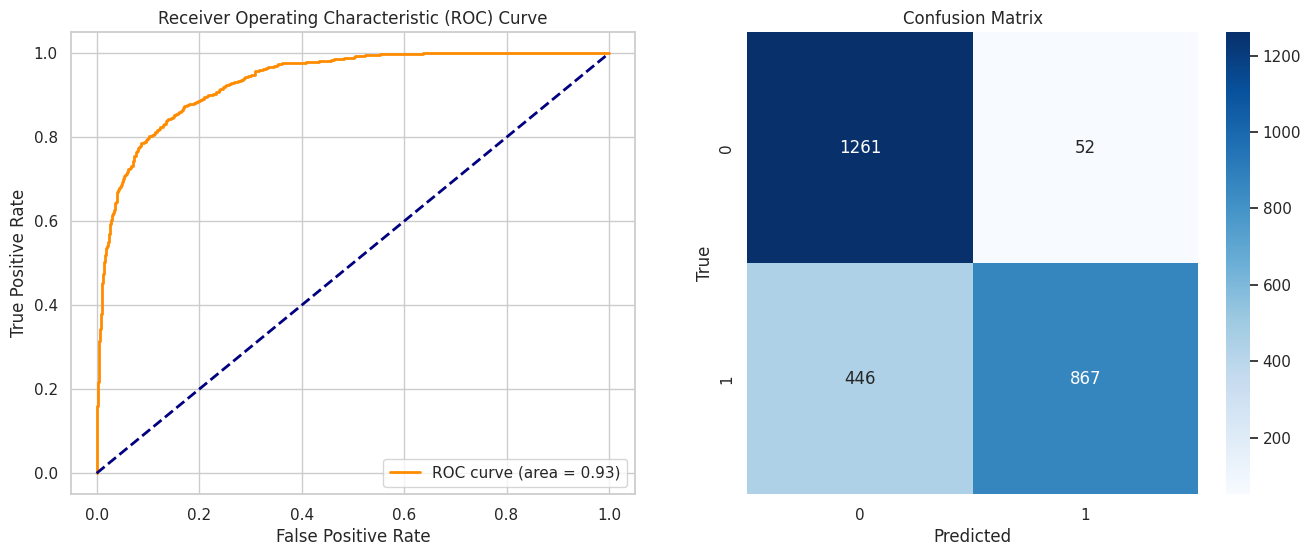

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Training Time (seconds)  | 0.4770345687866211 |
|         Accuracy         | 0.8103579588728104 |
|         F1 Score         | 0.7768817204301075 |
|        Precision         | 0.9434167573449401 |
|          Recall          | 0.6603198781416603 |
|         AUC-ROC          | 0.9349518465819281 |
| Log Loss (Cross Entropy) | 0.7870037202119902 |
+--------------------------+--------------------+


In [ ]:
X_train_ = X_train_resampled
y_train_ = y_train_resampled
X_test_ = X_test_resampled
y_test_ = y_test_resampled

xgb_clf = XGBClassifier(random_state=123)
model_metrics['XGB_W/O_PCA_IMBALANCED'] = evaluate_model(xgb_clf, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of XGBoost without PCA and with Data Balancing:**

**Training Time**: Training time is relatively short at around 0.48 seconds, benefiting from the efficiency of XGBoost and the balanced dataset.

**Accuracy**: Identical accuracy to the unbalanced model at 81.04%, suggesting that data balancing doesn't significantly impact the overall accuracy in this scenario.

**F1 Score, Precision, Recall, AUC-ROC, Log Loss (Cross Entropy)**: These metrics are exactly the same as the model without PCA and data balancing, indicating that in this particular case, the impact of data balancing on model performance is minimal.

### GBC (Gradient Boosting Classification)

#### GBC with PCA & Data Balancing SMOT

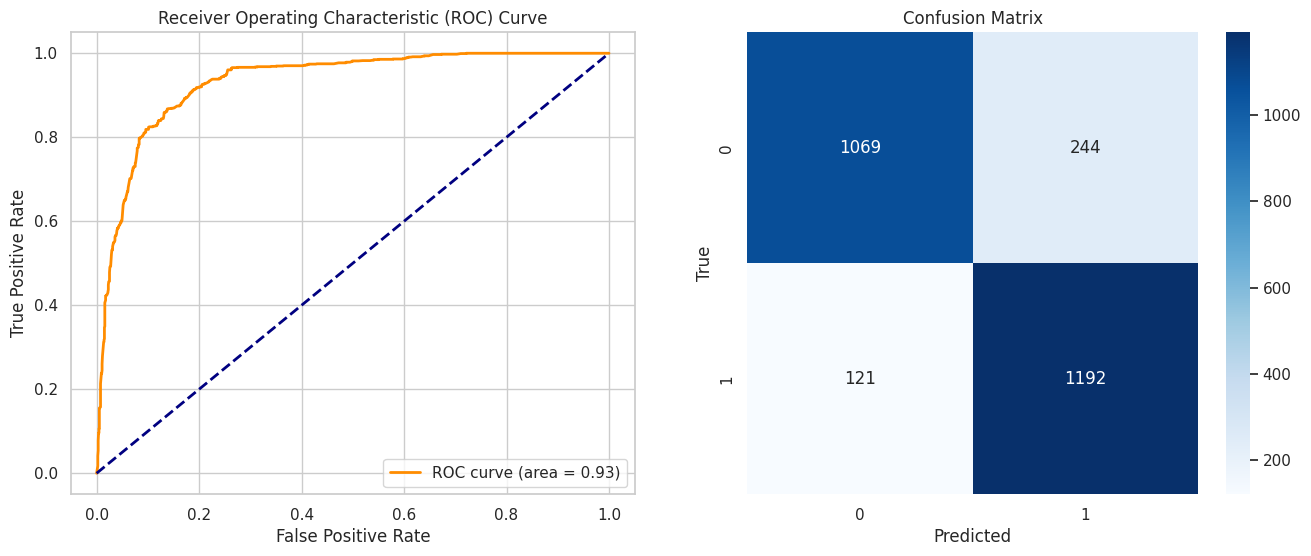

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  1.8137800693511963 |
|         Accuracy         |  0.861005331302361  |
|         F1 Score         |  0.8672244452528193 |
|        Precision         |   0.83008356545961  |
|          Recall          |  0.9078446306169079 |
|         AUC-ROC          |  0.9318262103320885 |
| Log Loss (Cross Entropy) | 0.33503249772667887 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_pca
y_train_ = y_train_resampled
X_test_ = X_test_pca
y_test_ = y_test_resampled

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_PCA'] = evaluate_model(gbc, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of Gradient Boosting Classification (GBC) with PCA and Data Balancing:**

**Training Time:** Moderately quick training time at approximately 1.81 seconds, benefiting from PCA's dimensionality reduction and the model's efficiency.

**Accuracy:** High accuracy at around 86.10%, indicating the model's effectiveness in correctly predicting outcomes.

**F1 Score:** Excellent F1 score of 86.72%, reflecting a strong balance between precision and recall.

**Precision and Recall:** High precision (83.01%) and higher recall (90.78%) suggest the model's proficiency in accurately identifying positive cases and capturing a significant portion of actual positive cases.

**AUC-ROC:** Very high AUC-ROC of 93.18%, demonstrating the model's excellent capability in distinguishing between classes.

**Log Loss (Cross Entropy):** Low log loss at 0.335, indicating a good level of prediction confidence.

#### GBC without PCA & SMOT

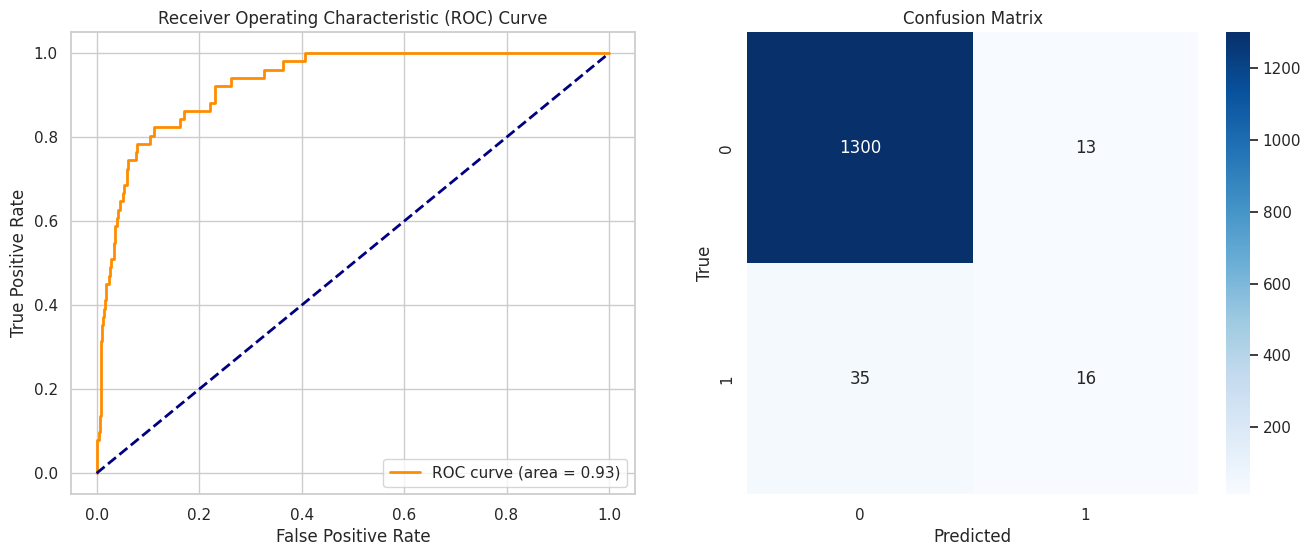

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  6.396823883056641  |
|         Accuracy         |  0.9648093841642229 |
|         F1 Score         |         0.4         |
|        Precision         |  0.5517241379310345 |
|          Recall          |  0.3137254901960784 |
|         AUC-ROC          |  0.9298717202036946 |
| Log Loss (Cross Entropy) | 0.10415415041461366 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train
y_train_ = y_train
X_test_ = X_test
y_test_ = y_test

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_W/O_PCA_BALANCED'] = evaluate_model(gbc, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of GBC without PCA and Data Balancing:**

**Training Time:** Longer training time at 6.40 seconds due to the increased complexity from handling a larger feature set without PCA.

**Accuracy:** Very high accuracy at 96.48%, suggesting excellent overall model performance.

**F1 Score:** Lower F1 score at 40%, indicating a disparity between precision and recall in the model's predictions.

**Precision and Recall:** Moderate precision (55.17%) and lower recall (31.37%) imply the model's tendency to miss positive cases, despite its high accuracy.

**AUC-ROC:** High AUC-ROC of 92.99%, showing strong class differentiation ability.

**Log Loss (Cross Entropy):** Very low log loss at 0.104, suggesting high confidence in the model's probability estimates.

#### GBC with SMOT

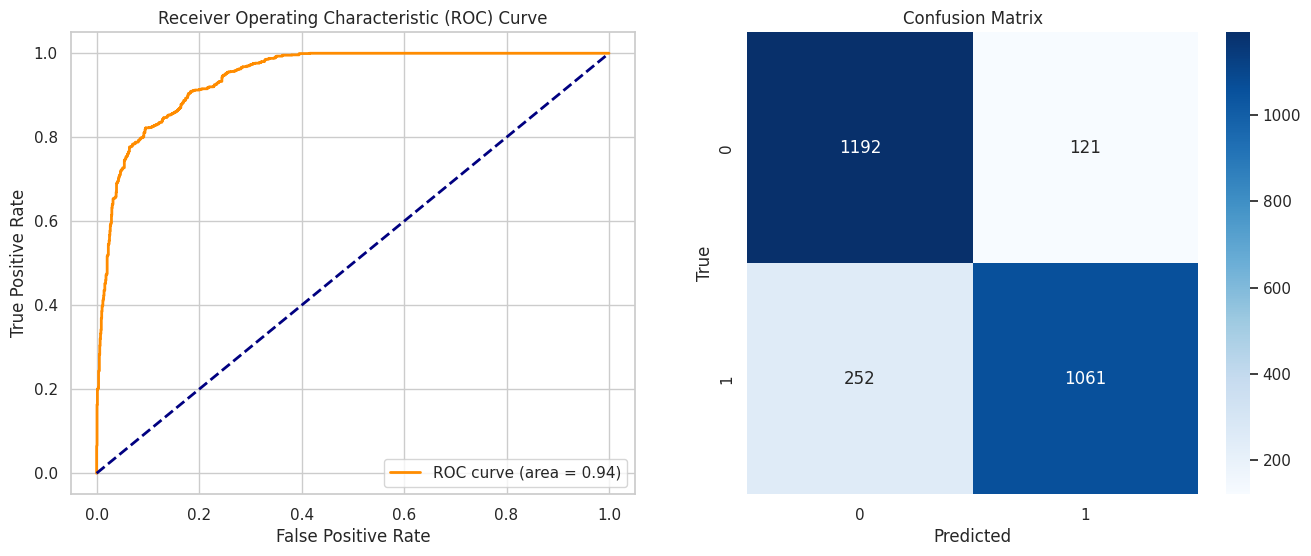

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Training Time (seconds)  |  7.949074983596802  |
|         Accuracy         |  0.857958872810358  |
|         F1 Score         |  0.850501002004008  |
|        Precision         |  0.8976311336717429 |
|          Recall          |  0.8080731150038081 |
|         AUC-ROC          |  0.9446997016767703 |
| Log Loss (Cross Entropy) | 0.32936809324365035 |
+--------------------------+---------------------+


In [ ]:
X_train_ = X_train_resampled
y_train_ = y_train_resampled
X_test_ = X_test_resampled
y_test_ = y_test_resampled

gbc = GradientBoostingClassifier(random_state=123)
model_metrics['GB_W/O_PCA_IMBALANCED'] = evaluate_model(gbc, X_train_, y_train_, X_test_, y_test_)

#### **Analysis of GBC without PCA and with Data Balancing:**

**Training Time:** The longest training time among the three setups at approximately 7.95 seconds, reflecting the added complexity of handling a balanced dataset without PCA.

**Accuracy:** Good accuracy at 85.80%, indicating reliable model performance.

**F1 Score:** High F1 score of 85.05%, showing a balanced performance between precision and recall.

**Precision and Recall:** High precision (89.76%) and good recall (80.81%), indicating the model's strong ability to identify positive cases correctly and cover a significant proportion of actual positive cases.

**AUC-ROC:** Excellent AUC-ROC of 94.47%, reflecting the model's outstanding ability to distinguish between classes.

**Log Loss (Cross Entropy):** Moderately low log loss at 0.329, showing a decent level of accuracy in the model's probability predictions.

In [ ]:
d = pd.DataFrame(model_metrics)

In [ ]:
pd.DataFrame(model_metrics).T.to_csv("result_6000.csv", encoding="utf-8", header=True, index=True)